In [ ]:
        Introduction to Pandas
        Reading Tabular Data
        Selecting Pandas Series
        Pandas Parentheses
        Renaming Columns
        Removing Columns
        Sorting
        Filtering
        Multiple Criteria Filtering
        Examining Dataset
        Using "axis" Parameter
        Using String Methods
        Changing data type
        Using "groupby"
        Exploring Series
        Handling Missing Values
        Using Pandas Index
        Selecting Multiple Rows and Columns
        Using "inplace" parameter
        Making DataFrame Smaller and Faster
        Pandas and Scikit-Learn
        Randomly Sample Rows
        Creating Dummy Variables
        Working with Date and Time
        Removing duplicate rows
        Filtering and Converting Series to NaN
        Changing Display Options
        Creating a DataFrame from objects
        Apply function to Series and DataFrame
        Dot function
        Calculate Central Tendency Measures
        Calculate Variability Measures
        Vectorization Methods

In [1]:
# PANDAS
import pandas as pd

In [105]:
# Create Data

names = ['Bob','Jessica','Mary','John','Mel']
births = [968, 155, 77, 578, 973]

# To merge these two lists together we will use the zip function.
BabyDataSet = list(zip(names,births))
BabyDataSet

[('Bob', 968), ('Jessica', 155), ('Mary', 77), ('John', 578), ('Mel', 973)]

In [106]:
df = pd.DataFrame(data = BabyDataSet, columns=['Names', 'Births'])
df

,Names,Births
0,Bob,968
1,Jessica,155
2,Mary,77
3,John,578
4,Mel,973


In [2]:
# reading a well-formatted .tsv file
url = 'http://bit.ly/chiporders'
orders = pd.read_table(url)
orders.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [3]:
url2 = 'http://bit.ly/movieusers'
users = pd.read_table(url2)
users.head()

,1|24|M|technician|85711
0,2|53|F|other|94043
1,3|23|M|writer|32067
2,4|24|M|technician|43537
3,5|33|F|other|15213
4,6|42|M|executive|98101


In [4]:
user_cols = ['user_id', 'age', 'gender', 'occupation', 'zip_code']
users = pd.read_table(url2, sep='|', header=None, names=user_cols)
users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [5]:
# The csv file is separated by commas
url = 'http://bit.ly/uforeports'

# method 1: read_table
ufo = pd.read_table(url, sep=',')

# method 2: read_csv
# this is a short-cut here using read_csv because it uses comma as the default separator
ufo = pd.read_csv(url)
ufo.head()


,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [6]:
# Method 1: Selecting City series (this will always work)
ufo['City']

# Method 2: Selecting City series
ufo.City

# 'City' is case-sensitive, you cannot use 'city'

0                      Ithaca
1                 Willingboro
2                     Holyoke
3                     Abilene
4        New York Worlds Fair
5                 Valley City
6                 Crater Lake
7                        Alma
8                     Eklutna
9                     Hubbard
10                    Fontana
11                   Waterloo
12                     Belton
13                     Keokuk
14                  Ludington
15                Forest Home
16                Los Angeles
17                  Hapeville
18                     Oneida
19                 Bering Sea
20                   Nebraska
21                        NaN
22                        NaN
23                  Owensboro
24                 Wilderness
25                  San Diego
26                 Wilderness
27                     Clovis
28                 Los Alamos
29               Ft. Duschene
                 ...         
18211                 Holyoke
18212                  Carson
18213     

In [7]:
# confirm type
type(ufo['City'])
type(ufo.City)

pandas.core.series.Series

In [8]:
ufo['Colors Reported']

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
5           NaN
6           NaN
7           NaN
8           NaN
9           NaN
10          NaN
11          NaN
12          RED
13          NaN
14          NaN
15          NaN
16          NaN
17          NaN
18          NaN
19          RED
20          NaN
21          NaN
22          NaN
23          NaN
24          NaN
25          NaN
26          NaN
27          NaN
28          NaN
29          NaN
          ...  
18211       NaN
18212       NaN
18213     GREEN
18214       NaN
18215       NaN
18216    ORANGE
18217       NaN
18218       NaN
18219       NaN
18220      BLUE
18221       NaN
18222       NaN
18223       NaN
18224       NaN
18225       NaN
18226       NaN
18227       NaN
18228       NaN
18229       NaN
18230       NaN
18231       NaN
18232       NaN
18233       RED
18234       NaN
18235       NaN
18236       NaN
18237       NaN
18238       NaN
18239       RED
18240       NaN
Name: Colors Reported, L

In [9]:
# created a new column called "Location" with a concatenation of "City" and "State"
ufo['Location'] = ufo.City + ', ' + ufo.State
ufo.head()

,City,Colors Reported,Shape Reported,State,Time,Location
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00,"Ithaca, NY"
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00,"Willingboro, NJ"
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00,"Holyoke, CO"
3,Abilene,NaN,DISK,KS,6/1/1931 13:00,"Abilene, KS"
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00,"New York Worlds Fair, NY"


In [11]:
url = 'http://bit.ly/imdbratings'
movies = pd.read_csv(url)

# Looking at the first 5 rows of the DataFrame
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [12]:
# This will show descriptive statistics of numeric columns
movies.describe()

,star_rating,duration
count,979.000000,979.000000
mean,7.889785,120.979571
std,0.336069,26.218010
min,7.400000,64.000000
25%,7.600000,102.000000
50%,7.800000,117.000000
75%,8.100000,134.000000
max,9.300000,242.000000


In [13]:
movies.describe(include=['float64'])

,star_rating
count,979.000000
mean,7.889785
std,0.336069
min,7.400000
25%,7.600000
50%,7.800000
75%,8.100000
max,9.300000


In [14]:
# Finding out dimensionality of DataFrame
movies.shape

(979, 6)

In [15]:
# Finding out data types of each columns
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

In [16]:
type(movies)

pandas.core.frame.DataFrame

In [18]:
url = 'http://bit.ly/uforeports'
ufo = pd.read_csv(url)
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [19]:
# Renaming Columns

# To check out only the columns
# It will output a list of columns
ufo.columns

Index(['City', 'Colors Reported', 'Shape Reported', 'State', 'Time'], dtype='object')

In [21]:
# Method 1: Renaming a single column

# inplace=True to affect DataFrame
ufo.rename(columns = {'Colors Reported': 'Colors_Reported', 'Shape Reported': 'Shape_Reported'}, inplace=True)
ufo.columns

Index(['City', 'Colors_Reported', 'Shape_Reported', 'State', 'Time'], dtype='object')

In [22]:
# Method 2: Renaming multiple columns

ufo_cols = ['city', 'colors reported', 'shape reported', 'state', 'time']
ufo.columns = ufo_cols
ufo.head()

,city,colors reported,shape reported,state,time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [23]:
# Replacing spaces with underscores for all columns 
ufo.columns = ufo.columns.str.replace(' ', '_')
ufo.head()

,city,colors_reported,shape_reported,state,time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [28]:
# Removing Columns

# Creating pandas DataFrame
url = 'http://bit.ly/uforeports'
ufo = pd.read_csv(url)
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [29]:
ufo.shape

(18241, 5)

In [30]:
# Removing column
# axis=0 row axis
# axis=1 column axis
# inplace=True to effect change
ufo.drop('Colors Reported', axis=1, inplace=True)
ufo.head()

,City,Shape Reported,State,Time
0,Ithaca,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,OTHER,NJ,6/30/1930 20:00
2,Holyoke,OVAL,CO,2/15/1931 14:00
3,Abilene,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,LIGHT,NY,4/18/1933 19:00


In [31]:
# Removing column
list_drop = ['City', 'State']
ufo.drop(list_drop, axis=1, inplace=True)
ufo.head()

,Shape Reported,Time
0,TRIANGLE,6/1/1930 22:00
1,OTHER,6/30/1930 20:00
2,OVAL,2/15/1931 14:00
3,DISK,6/1/1931 13:00
4,LIGHT,4/18/1933 19:00


In [32]:
# Removing rows 0 and 1
# axis=0 is the default, so technically, you can leave this out
rows = [0, 1]
ufo.drop(rows, axis=0, inplace=True)
ufo.head()

,Shape Reported,Time
2,OVAL,2/15/1931 14:00
3,DISK,6/1/1931 13:00
4,LIGHT,4/18/1933 19:00
5,DISK,9/15/1934 15:30
6,CIRCLE,6/15/1935 0:00


In [33]:
# Sorting

url = 'http://bit.ly/imdbratings'
movies = pd.read_csv(url)
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [34]:
# sort using sort_values
# sort with numbers first then alphabetical order
movies.title.sort_values()

# alternative sorting
movies['title'].sort_values()

542                   (500) Days of Summer
5                             12 Angry Men
201                       12 Years a Slave
698                              127 Hours
110                  2001: A Space Odyssey
910                                   2046
596                               21 Grams
624                              25th Hour
708                       28 Days Later...
60                                3 Idiots
225                                 3-Iron
570                                    300
555                           3:10 to Yuma
427           4 Months, 3 Weeks and 2 Days
824                                     42
597                                  50/50
203                                  8 1/2
170                       A Beautiful Mind
941                       A Bridge Too Far
571                           A Bronx Tale
266                      A Christmas Story
86                      A Clockwork Orange
716                         A Few Good Men
750        

In [35]:
# returns a series
type(movies['title'].sort_values())

pandas.core.series.Series

In [36]:
# sort in ascending=False
# this does not affect the underlying data
movies.title.sort_values(ascending=False)

864                                  [Rec]
526                                   Zulu
615                             Zombieland
677                                 Zodiac
955                       Zero Dark Thirty
535                                  Zelig
280                     Young Frankenstein
96                                 Yojimbo
235                                Yip Man
403                             Ying xiong
695                      Y Tu Mama Tambien
871                                     X2
532                     X-Men: First Class
248             X-Men: Days of Future Past
954                                  X-Men
518                         Wreck-It Ralph
970                            Wonder Boys
65             Witness for the Prosecution
920                                Witness
483                           Withnail & I
270                        Wings of Desire
497    Willy Wonka & the Chocolate Factory
127                      Wild Strawberries
219        

In [37]:
movies.sort_values('title')

,star_rating,title,content_rating,genre,duration,actors_list
542,7.8,(500) Days of Summer,PG-13,Comedy,95,"[u'Zooey Deschanel', u'Joseph Gordon-Levitt', ..."
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
201,8.1,12 Years a Slave,R,Biography,134,"[u'Chiwetel Ejiofor', u'Michael Kenneth Willia..."
698,7.6,127 Hours,R,Adventure,94,"[u'James Franco', u'Amber Tamblyn', u'Kate Mara']"
110,8.3,2001: A Space Odyssey,G,Mystery,160,"[u'Keir Dullea', u'Gary Lockwood', u'William S..."
910,7.5,2046,R,Drama,129,"[u'Tony Chiu Wai Leung', u'Ziyi Zhang', u'Faye..."
596,7.7,21 Grams,R,Crime,124,"[u'Sean Penn', u'Benicio Del Toro', u'Naomi Wa..."
624,7.7,25th Hour,R,Crime,135,"[u'Edward Norton', u'Barry Pepper', u'Philip S..."
708,7.6,28 Days Later...,R,Horror,113,"[u'Cillian Murphy', u'Naomie Harris', u'Christ..."
60,8.5,3 Idiots,PG-13,Comedy,170,"[u'Aamir Khan', u'Madhavan', u'Mona Singh']"


In [40]:
# Filtering

url = 'http://bit.ly/imdbratings'

# create DataFrame called movies
movies = pd.read_csv(url)

movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [41]:
movies.shape

(979, 6)

In [42]:
# We want to create a list of booleans with the same number of rows as the movies' DataFrame

#    True if duration > 200
#    False if otherwise

# create list
booleans = []

# loop
for length in movies.duration:
    if length >= 200:
        booleans.append(True)
    else:
        booleans.append(False)

In [43]:
booleans[0:5]

[False, False, True, False, False]

In [44]:
# len(booleans) is the same as the number of rows in movies' DataFrame
len(booleans)

979

In [46]:
# convert booleans into a Pandas series
is_long = pd.Series(booleans)

is_long.head()

0    False
1    False
2     True
3    False
4    False
dtype: bool

In [47]:
# pulls out genre
movies['genre']

0          Crime
1          Crime
2          Crime
3         Action
4          Crime
5          Drama
6        Western
7      Adventure
8      Biography
9          Drama
10     Adventure
11        Action
12        Action
13         Drama
14     Adventure
15     Adventure
16         Drama
17         Drama
18     Biography
19        Action
20        Action
21         Crime
22         Drama
23         Crime
24         Drama
25        Comedy
26       Western
27         Drama
28         Crime
29        Comedy
         ...    
949       Comedy
950        Crime
951        Drama
952       Comedy
953    Adventure
954       Action
955        Drama
956       Comedy
957       Comedy
958        Drama
959       Comedy
960       Comedy
961    Biography
962       Comedy
963       Action
964    Biography
965      Mystery
966    Animation
967       Action
968        Drama
969        Crime
970        Drama
971       Comedy
972        Drama
973        Drama
974       Comedy
975    Adventure
976       Acti

In [48]:
# this pulls out duration >= 200mins
movies[is_long]

,star_rating,title,content_rating,genre,duration,actors_list
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
85,8.4,Lawrence of Arabia,PG,Adventure,216,"[u""Peter O'Toole"", u'Alec Guinness', u'Anthony..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
204,8.1,Ben-Hur,G,Adventure,212,"[u'Charlton Heston', u'Jack Hawkins', u'Stephe..."
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


In [49]:
# Faster method without a for loop

# this line of code replaces the for loop
# when you use a series name using pandas and use a comparison operator, it will loop through each row
is_long = movies.duration >= 200
is_long.head()

0    False
1    False
2     True
3    False
4    False
Name: duration, dtype: bool

In [50]:
movies[is_long]

,star_rating,title,content_rating,genre,duration,actors_list
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
85,8.4,Lawrence of Arabia,PG,Adventure,216,"[u""Peter O'Toole"", u'Alec Guinness', u'Anthony..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
204,8.1,Ben-Hur,G,Adventure,212,"[u'Charlton Heston', u'Jack Hawkins', u'Stephe..."
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


In [51]:
# Even better way to simplify movies[is_long]

movies[movies.duration >= 200]

,star_rating,title,content_rating,genre,duration,actors_list
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
85,8.4,Lawrence of Arabia,PG,Adventure,216,"[u""Peter O'Toole"", u'Alec Guinness', u'Anthony..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
204,8.1,Ben-Hur,G,Adventure,212,"[u'Charlton Heston', u'Jack Hawkins', u'Stephe..."
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


In [53]:
# this is a DataFrame, we use dot or bracket notation to get what we want
movies[movies.duration >= 200]['genre']
movies[movies.duration >= 200].genre

2          Crime
7      Adventure
17         Drama
78         Crime
85     Adventure
142    Adventure
157        Drama
204    Adventure
445    Adventure
476        Drama
630    Biography
767       Action
Name: genre, dtype: object

In [54]:
# best practice is to use .loc instead of what we did above by selecting columns
movies.loc[movies.duration >= 200, 'genre']

2          Crime
7      Adventure
17         Drama
78         Crime
85     Adventure
142    Adventure
157        Drama
204    Adventure
445    Adventure
476        Drama
630    Biography
767       Action
Name: genre, dtype: object

In [56]:
# when you wrap conditions in parantheses, you give order
# you do those in brackets first before 'and'
# AND
movies[(movies.duration >= 200) & (movies.genre == 'Drama')]

,star_rating,title,content_rating,genre,duration,actors_list
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


In [57]:
# OR 
movies[(movies.duration >= 200) | (movies.genre == 'Drama')]

,star_rating,title,content_rating,genre,duration,actors_list
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
9,8.9,Fight Club,R,Drama,139,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh..."
13,8.8,Forrest Gump,PG-13,Drama,142,"[u'Tom Hanks', u'Robin Wright', u'Gary Sinise']"
16,8.7,One Flew Over the Cuckoo's Nest,R,Drama,133,"[u'Jack Nicholson', u'Louise Fletcher', u'Mich..."
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
22,8.7,It's a Wonderful Life,APPROVED,Drama,130,"[u'James Stewart', u'Donna Reed', u'Lionel Bar..."
24,8.7,Se7en,R,Drama,127,"[u'Morgan Freeman', u'Brad Pitt', u'Kevin Spac..."
27,8.6,The Silence of the Lambs,R,Drama,118,"[u'Jodie Foster', u'Anthony Hopkins', u'Lawren..."


In [58]:
(movies.duration >= 200) | (movies.genre == 'Drama')

0      False
1      False
2       True
3      False
4      False
5       True
6      False
7       True
8      False
9       True
10     False
11     False
12     False
13      True
14     False
15     False
16      True
17      True
18     False
19     False
20     False
21     False
22      True
23     False
24      True
25     False
26     False
27      True
28     False
29     False
       ...  
949    False
950    False
951     True
952    False
953    False
954    False
955     True
956    False
957    False
958     True
959    False
960    False
961    False
962    False
963    False
964    False
965    False
966    False
967    False
968     True
969    False
970     True
971    False
972     True
973     True
974    False
975    False
976    False
977    False
978    False
Length: 979, dtype: bool

In [59]:
(movies.duration >= 200) & (movies.genre == 'Drama')

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17      True
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
949    False
950    False
951    False
952    False
953    False
954    False
955    False
956    False
957    False
958    False
959    False
960    False
961    False
962    False
963    False
964    False
965    False
966    False
967    False
968    False
969    False
970    False
971    False
972    False
973    False
974    False
975    False
976    False
977    False
978    False
Length: 979, dtype: bool

In [60]:
# fast method
filter_list = ['Crime', 'Drama', 'Action']
movies[movies.genre.isin(filter_list)]

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
9,8.9,Fight Club,R,Drama,139,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh..."
11,8.8,Inception,PG-13,Action,148,"[u'Leonardo DiCaprio', u'Joseph Gordon-Levitt'..."
12,8.8,Star Wars: Episode V - The Empire Strikes Back,PG,Action,124,"[u'Mark Hamill', u'Harrison Ford', u'Carrie Fi..."
13,8.8,Forrest Gump,PG-13,Drama,142,"[u'Tom Hanks', u'Robin Wright', u'Gary Sinise']"


In [ ]:
# Iterating through a Series and DataFrame


In [61]:
link = 'http://bit.ly/uforeports'
ufo = pd.read_csv(link)
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [62]:
# intuitive method
for c in ufo.City:
    print(c)

Ithaca
Willingboro
Holyoke
Abilene
New York Worlds Fair
Valley City
Crater Lake
Alma
Eklutna
Hubbard
Fontana
Waterloo
Belton
Keokuk
Ludington
Forest Home
Los Angeles
Hapeville
Oneida
Bering Sea
Nebraska
nan
nan
Owensboro
Wilderness
San Diego
Wilderness
Clovis
Los Alamos
Ft. Duschene
South Kingstown
North Tampa
Ft. Lee
Salinas AFB
Jasper
Winston-Salem
Portsmouth
Dallas
Huntington Beach
San Antonio
Roswell
New York City
Merced
Alice
Blairsden
Index
South Portland
Oak Lawn
Dome
Conroe
Syracuse
Miami
San Deigo
Minden
Cleveland
Espanola
Oroville
Oakmont
Winona
Gackle
Madison
Hayward
Tacoma
Baltimore
Cashmere
Maywood
Wexford
Sioux Falls
Seattle
Dell Rapids
Philadelphia
Roswell
Johnston City
Roswell
Syracuse
Richmond
Las Vegas
Keeneyville
Clintwood
Hazelton
Minneapolis
Morehouse
San Jose
Raton
Modesto
Green Valley
Henrietta
Saranac Lake
Proctor
Whitmore Lake
Kelseyville
Scipio
Borger
Baltimore
Jim Ridge
Ojai
New York City
Conshohocken
Sharpsburg
Seattle
Oak Ridge
Grays
Los Angeles
Anchorage
K

Honolulu
Kent
San Antonio
Warren
Lockport
McLean
La Habra
Lansing
Bemus Point
Provo
South Windsor
Indian Orchard
Tyre
Roseville
Pittsfield
Pearl Harbor
Custer
Englewood
Kindred
Levittown
Newark
Grand Blanc
Grand Blanc
Stockton
Cottonwood
nan
Racine
Pompano Beach
Everton
Palmdale
Ocean City
Newport
Seymore
Spring City
Sebastian
Toms River
Brady
Brady
Los Angeles
Pittsburgh
Mundelin
San Angelo
Deer Creek
Sturgeon
Russellton
Quincy
Homestead
New York City
New York City
Bentonville
Summit Lake Indian Reservation
Tampa
New York City
Bellmore
Manchester
Westland
San Diego
Lindenhurst
Corpus Christi
Rochester
Beardstown
Franklin
Columbus
Somerville
Union
Albuquerque
Newton Centre
Meriden
Lake  Wales
Colorado Springs
Berlin
Tewksbury
Waverly Hall
Gorham
Conshohocken
Havensville
Everglades
Savannah
Deltona
Los Angeles
Boulder Creek
Santa Rosa
Orlando
Talladega
Osceola
Carrolton
Dennis
Rural New Mexico
Burlington
Thomasville
Lewisburg
Cherokee
Molson
New Martinsville
Cowpen
Irmo
Kennett Square
P

Arvana
Arvana-Lamesa
Mt. Rainier National Park
Deer Park
Rockland County
Edison
Ringwood
Mexico
Lake Don Pedro
Sisters
Huntington Park
Seattle
Helmetta
Valdosta
Indianapolis
Hopewell
Hwy 80
Orange
Redondo Beach
Norman
Key West
Los Angeles
Clines Corners
Salt Lake City
Houston
Lake Arrowhead
Tallmadge
Helena
Huntersville
Louden County
Alexandria
Grover Beach
Pismo Beach
Tallmadge
Medford
Downey
Buies Creek
California Hot Springs
Lee's Summit
Woodinville
Baker City
Big Sur
North Webster
Middletown
Between Jackson Fla.
Middletown
Salinas
Berkeley
Thomasville
West Milford
Dallas
Portland
East Providence
Jupiter
Jacksonville
Monterey
Kenton
Lexington
North Brunswick
New Brunswick
Gainesville
Marlboro
Kerrville
Watson
Panama City Beach
Wordens Pond Road
Albuquerque
Sanderville
Omaha
San Antonio
Bradford
Brady
Baltic
Daytona
Minot
Tatum
Cleveland
Laredo
Alameda
Morrice
Ithaca
Margate
Mesa
Fredericksburg
Griffin
Knoxville
Victory Heights
Whitman
Wilsonville
Castro Valley
Court House Bay
Farmin

Fort Lewis
Sweetwater
Dexter
Dexter
Dexter
Stockton
Scaley
Tecumseh
Anaheim
Anaheim
Sunnyvale
El Dorado Hills
Alamogordo
Hickory Plains
south of the border
Fort Lauderdale
Hilo
Ohio City
Liberty
Miami to St. Paul
Santa Rosa
I-10
Ovid
Memphis
Wagoner
Philadelphia
Fort Collins
Jackson
San Diego
Wenatchee
San Bernardino
Laramie
Laramie
Bourbonnais
Montgomery
Waldorf
Mahogany Hammock
Mont Alto
Chicago
Kenosha
Savannah
Shiocton
Eastern border
Fort Worth
Marshall Creek
Poughkeepsie
Yakima
New Lenox
Sheridan
Houston
Tulsa
Rockfish
Woodstock
Grand Junction
Wallops Island
Idaho Falls
Mentone
New York City
Walnut Cove
Port Townsend
Lemoore
Golden Shores
Palo
Tuttle
Sedona
Talladega
Richmond
Tucson
Wichita Falls
Tazewell
Louisiana
Malvern
Tyler
Hooksett
Interstate 40
Barneveld
Manassas
Ridgecrest
Kent
Quitman
San Diego
Baker City
Chicago
New Mexico
Peoria
Whitehouse Station
San Diego
Mansfield
Daytona Beach
Rhinebeck
Groveland
Dallas
Hilo
New Cumberland
Pittsfield
Wheelock
South Elgin
Vandalia
En

Bakersfield
Haslett
Williamsburg
Folsom
Bakersfield
Mesa
Boyertown
Burlington
Hendersonville
Boulder
Pridice Valley
Alvin
Apple Valley
Goleta
Tajunga
Yarldey
Newport
Norristown
Richmond
Friday Harbor
Pottstown
Brooklyn
West Memphis
Brooklyn
Tacoma
Boston
Newell area
Austin
Earlville
Asheville
Gilbert
Pinehurst
Urbana
Kilgore
Woodinville
Great Falls
Medford
Carrollton
Villa Rica
Tacoma
Milton
Pacificia
Leesport
Gilbertsville
New Smyrna Beach
Pembrook Pines
Clovis
Binghamton
Richmond
Augusta
Lake Sullivan
Fargo
Watauga
Hansville
Palatine
Newport
Oregon
Danville
Louisville
Oregon City
Milpitas
Portland
Bakersfield
Seattle
Oregon
Wheeling
MM 99 mile Exit
Bradenton
Hickory Corners
Beaver Creek
Quartzsite
Grape Creek
Portland
Brooklyn
Flagstaff
Grand Rapids
Spokane
Mt. City
San Diego
Riverview
Lansing
White Sands
Killawog
Sun Prairie
Brockton
Zanesville
Memphis
Reno
Amsterdam
Alden
Fremont
Conifer
Huntington
Watertown
Lebanon
Phoenix
Gresham
Cannon
Massillon
Seattle
Vista
Columbia
Houston
Wh

Gila Bend
Stanfield
East Mesa
Glendale
Kingman
Phoenix
Phoenix
Phoenix
Phoenix
Phoenix
Phoenix
Phoenix
Phoenix
Tempe
Prescott
Black Canyon City
Phoenix
Phoenix
Phoenix
Prescott
Prescott
Scottsdale
Northwest Tempe
Phoenix
Phoenix
Buckeye
Glendale
Cass City
Chandler
Chandler
Chino Valley
Gila Bend
Goodyear
Mt. Springs
Phoenix
Phoenix
Phoenix
Phoenix
Phoenix
Tempe
Tempe
Libby
Mesa
Phoenix
Phoenix
Henderson
Phoenix
Phoenix
Phoenix
Phoenix
Phoenix
Prescott
Phoenix
Monterey
Sciotoville
Casa Grande
Dateland
Glendale
Phoenix
Tucson
Phoenix
Fresno
Dunnellon
Sahuarita
Tonopah
Los Angeles
Colorado Springs
New York City
Kalamazoo
San Tan Valley
Woodinville
Buena Vista
Miami
Bossier Parish
Fort Hood
San Diego
Iron River
Oakton
Yuma
Osterville
Mountain View
Salton Sea
Maricopa
Lincoln City
Aquaduct
Wickenburg
Mesa
San Diego
Tucson
Cleveland
Phoenix
Santa Fe
Whitefish
Yucaipa
Scottsdale
McDonough
Bakersfield
Lake Geneva
Unadilla
Stevens Point
Albuquerque
Tigard
Nederland
Nederland
Manassas
Stockton
O

Tracy
San Fernando
Everett
Toledo
Thomasville
Sterling
Simi Valley
Seattle
Pontiac
Annapolis
Crestline
New York City
San Juan Islands
Gridley
El Dorado
North Plains
Beacon Falls
Friendswoods
Darien
Dayton
Silverhill
Albuquerque
Dania
Flagstaff
Reno
Reno
Des Moines
San Antonio
Oxnard
Marysville
Rushville
Gobles
Illwaco
Centreville
High Ridge
Woodbridge
Torrance
Mt Sterling
Bishop
Salem
Madera
Osceola
Telluride
Northglenn
Xenia
Sparta
East Hartford
Houston
Albuquerque
Westfield
Landover
Pebble Beach
Sandpoint
Mariposa
Waterford
Oregon
Villa Nueva State Park
San Diego
Minneapolis
Mobile
West Islip
Mt. Vernon
Frances
San Francisco
West Salem
St. Augustine
Tucson
New York City
Seaside
Leonardo
Tolono
Jonesville
Avoca
Thompson
Desert Center
Ft. Myers Beach
Snow Shoe
Cheyenne
Galesburg
Schaumburg
Juneau
Portland
Stanton
Crescent City
Rochester
Freeport
Cheyenne
Duarte
Blue River
Hartsdale
Mt. Rainier north side, near Cateract Valley
Charleston
Kimball Twp.
Medicine Bow Natl. Forest
Tyler
Bake

Blythe
Claremont
Houston
Pound Ridge
Robbins
Lincoln
Kennewick
Durango
Kansas City
Las Vegas
Tonasket
Myrtle Beach
Minneapolis
Largo
Clarkson
Spokane
Fort Lewis
Tulsa
Hood River
West Palm Beach
Bay Point
Owings Mills
Wheaton
Spring Green
Thornton
Trona
South China
Tracy
Marietta
Modena
Cedar City
Van Horn
Huntingdon Valley
Woodbine
Coalinga
Lancaster County
Garland
Philadelphia
Alamosa
Hale
Ashland
Boca Raton
Jacksonville
Oklahoma City
Walworth County
Manitowoc
Seneca
Rocky Mount
Sandy
Moses Lake
Colorado Springs
Cincinnati
Verhalen
Bricktown
Portland
Leeds
Vestal
Chicago
Spokane
Shelbyville
Monroe
Edgewood
Macwahoc
Palm Springs
Canon City
Fort A.P. Hill
Shoreline
Ravenna
The Colony
Vancouver
Rogerville
Winlock
Lebanon
Dayton
Bremerton
Ponca City
Twin Falls
Bellingham
Dolgeville
HighPoint
Redmond
Kankakee
Ballard
Akeley
Miami Beach
Cortez
Salt Lake City
Rocky Mount
South Point
San Jose
Tucson
Cleveland
Seattle
Seattle
Seattle
The Colony
Bear Valley Ski Resort
Bethlehem
Rialto
Boalsburg

Tucson
Fountain Valley
Sterling
Venice
Lake Pontchartrain
Springfield
Houston
Oskaloosa
Memphis
Alhambra Golf Course
Springfield
Paterson
Pearl River
Grove City
Longwood
Boone
Prescott Valley
Ogden
Kansas City
Miami
Rockford
Quincy
Kenosha
Salt Lake City
Ocean Shores
Irvine
Silver Spring
Roland
Hugo
Venice
Harrisonville
Gaithersburg
Kansas City
Corry
Severna Park
Fresno
Gulf Breeze
Magna
Silver Spring Twp.
Fort Smith
Fallbrook
Portland
Memphis
Powhatan
Fort Myers
Vassalboro
Buffalo
Eureka Springs
Conway
Houston
Timbo
Timbo
Fredericksburg
Olive Branch
Smyrna
Little Rock
Sallisaw
Elmira
Springfield
Lonoke
Mountain Home
Rockford
Atlanta
Ephrata
Price
Freedom
Rockford
Rockford
Duncansville
nan
Mobile
Houston
Citrus Heights
Fair Oaks
Orangevale
Gold Bar
Santa Barbara
Dover
Las Vegas
Gold Bar
Buckeye
Coral Springs
Ocala
Simi Valley
Sunland
Encino
Seattle
Marquette
Sedona
Falconer
Escondido
Arkansas
Plymouth Borough
Jacksonville
Seattle
Torrance
Healdsburg
San Jose
Charleston
Clarinda
New Yor

Arlington
Westlake
Hazelwood
Belfry
Breinigsville
Lyndhurst
St. Joseph
Seagoville
Phoenix
Destin
Oostburg
Warrior
Kingman
Morro Bay
Cordova
Olympia
Jackson
Coeur d'Alene
Greensboro
Omaha
Seattle
Oregon
West Allenhurst
Fountain City
El Paso
Belton
Corpus Christi
Valley Stream
Palm Desert
Atlanta
Atlanta
Auburn
Clintwood
Norwalk
Atlanta
Burlington
Denver
Aptos
Conyers
Elizabeth
Carrollton
Wax
Broken Arrow
Camarillo
Ellisville
Claremore
La Jolla
Jellico
Progresso
Iron River
Dalton
Helena
Morganton
Eugene
North Miami Beach
Peoria
Phoenix
Kennewick
Edina
Placerville
Sherwood
Kapa'a
Port St. Lucie
Galway
Newark
Kilauea
Kilauea
Lawai
Lawai
Lawai
Grand Blanc
Devils Lake
Avondale
South Bend
Avoca
Longwood
Lemon Grove
Hamburg
Gloucester
Lake Tahoe
Seldon
Anthem
Phoenix
Fort Wayne
Dallas
Concord
Maple Valley
St. Louis
Schnecksville
Monticello
Auburn
Beaverton
Pomona
North Tonawanda
O'Fallon
Darrington
Corvallis
Portland
Brooklyn Park
Ardmore
Lake Havasu City
Thorntown
Tonawanda
Pueblo
Roswell
For

In [63]:
# pandas method
# you can grab index and row
for index, row in ufo.iterrows():
    print(index, row.City, row.State)

0 Ithaca NY
1 Willingboro NJ
2 Holyoke CO
3 Abilene KS
4 New York Worlds Fair NY
5 Valley City ND
6 Crater Lake CA
7 Alma MI
8 Eklutna AK
9 Hubbard OR
10 Fontana CA
11 Waterloo AL
12 Belton SC
13 Keokuk IA
14 Ludington MI
15 Forest Home CA
16 Los Angeles CA
17 Hapeville GA
18 Oneida TN
19 Bering Sea AK
20 Nebraska NE
21 nan LA
22 nan LA
23 Owensboro KY
24 Wilderness WV
25 San Diego CA
26 Wilderness WV
27 Clovis NM
28 Los Alamos NM
29 Ft. Duschene UT
30 South Kingstown RI
31 North Tampa FL
32 Ft. Lee VA
33 Salinas AFB CA
34 Jasper FL
35 Winston-Salem NC
36 Portsmouth VA
37 Dallas TX
38 Huntington Beach CA
39 San Antonio NM
40 Roswell NM
41 New York City NY
42 Merced CA
43 Alice TX
44 Blairsden CA
45 Index WA
46 South Portland ME
47 Oak Lawn IL
48 Dome AZ
49 Conroe TX
50 Syracuse NY
51 Miami FL
52 San Deigo CA
53 Minden LA
54 Cleveland OH
55 Espanola NM
56 Oroville CA
57 Oakmont PA
58 Winona MN
59 Gackle ND
60 Madison WI
61 Hayward CA
62 Tacoma WA
63 Baltimore MD
64 Cashmere WA
65 Maywoo

578 Tehachapi CA
579 Del Mar CA
580 Bristol VA
581 St. Paul MN
582 Hartwell GA
583 Winston-Salem NC
584 Houston TX
585 Houston TX
586 Tucson AZ
587 Schenectady NY
588 Terre Haute IN
589 Great Bend KS
590 Salt Lake City UT
591 Seattle WA
592 Yakima WA
593 Palmdale CA
594 Sacramento CA
595 Chadd's Ford PA
596 New Jersey NJ
597 Watervliet MI
598 Vassalboro ME
599 Silverfdale WA
600 Santa Ana CA
601 Cape Canaveral FL
602 Philadelphia PA
603 Barstow-Baker CA
604 Great Falls MT
605 Quincy CA
606 Baltimore MD
607 Kansas City KS
608 Chicago IL
609 East Bernstadt KY
610 Albertson NY
611 Litchfield PA
612 Portland OR
613 nan NV
614 Stevens MN
615 Portland OR
616 New Berlin WI
617 Springdale AR
618 La Verne CA
619 Pacific Coast Highway CA
620 Goldsboro NC
621 Amarillo TX
622 Upland CA
623 Allentown PA
624 Taftville CT
625 Boston MA
626 Carteret NJ
627 Crystal WI
628 Cherokee NC
629 Belmont NY
630 Watchung NJ
631 Cottonwood WA
632 Saugus MA
633 Framingham MA
634 Long Beach CA
635 Pittsburgh PA
636

1078 Hollis NH
1079 Culver City CA
1080 Virginia Beach VA
1081 Dillon MT
1082 Fort Ord CA
1083 Tahlequah OK
1084 Sullivan IL
1085 Oneonta NY
1086 Beaverton OR
1087 Aurora OH
1088 Roseville MI
1089 West Lafayette IN
1090 Vernon TX
1091 Lowell IN
1092 Lowell IN
1093 Charleston SC
1094 New York City NY
1095 New York City NY
1096 Rutland MA
1097 Jefferson City MO
1098 Spotswood NJ
1099 New Kensington PA
1100 Indianapolis IN
1101 Titusville PA
1102 Terrebonne OR
1103 Great Bend KS
1104 Kennewick WA
1105 Waterville ME
1106 Desert NM
1107 Biloxi MS
1108 Colonial Heights VA
1109 Dushore PA
1110 Pittsburgh PA
1111 Studio City CA
1112 Reseda CA
1113 Norwalk CT
1114 Pittsburgh PA
1115 Pittsburgh PA
1116 Ponca City OK
1117 New Rochelle NY
1118 Tabor IA
1119 Beverly MA
1120 La Jolla CA
1121 La Jolla CA
1122 La Jolla CA
1123 Joppatown MD
1124 Danvers MA
1125 Billerica MA
1126 B-52; inflight NH
1127 Jacksonville FL
1128 Old Saybrook CT
1129 Middletown NY
1130 Syosset NY
1131 Colmar Manor MD
1132 New 

1578 Valparaiso IN
1579 Valparaiso IN
1580 Omaha NE
1581 St. Louis MO
1582 Stevens Point WI
1583 Jones MI
1584 Provo UT
1585 Towaco NJ
1586 Morehead KY
1587 Delta CO
1588 Binghamton NY
1589 Clovis CA
1590 Sanford FL
1591 Dayton OH
1592 Chicago IL
1593 Las Vegas NV
1594 Camden AR
1595 Corry PA
1596 Billings MT
1597 Ash Grove MD
1598 Fairfield CA
1599 Gadsden AL
1600 Columbia SC
1601 Monmouth Junction NJ
1602 Winnie TX
1603 Zanesville OH
1604 Houston TX
1605 Mississippi MS
1606 Renton WA
1607 Minot ND
1608 Rocky Mountains CA
1609 Rocky Mountains CA
1610 Lake Havasu City AZ
1611 Duluth MN
1612 NAS Fallon NV
1613 Minot ND
1614 State College PA
1615 Downers Grove IL
1616 Woodland Hills CA
1617 St. Paul MN
1618 Shrewsbury MA
1619 Coyanosa TX
1620 Panama City FL
1621 Greensboro NC
1622 Akron OH
1623 Canoga Park CA
1624 Fort Hood TX
1625 Baytown TX
1626 Bishop CA
1627 Louisville KY
1628 Oak Cliff TX
1629 Oak Cliff TX
1630 Pasadena TX
1631 Livingston NJ
1632 Allentown PA
1633 Pittsburgh PA
1634

2074 Dennis MA
2075 Rural New Mexico NM
2076 Burlington NC
2077 Thomasville GA
2078 Lewisburg WV
2079 Cherokee AL
2080 Molson WA
2081 New Martinsville WV
2082 Cowpen SC
2083 Irmo SC
2084 Kennett Square PA
2085 Palos Verde CA
2086 Holliday TX
2087 Newport TN
2088 Westminster CO
2089 Albany GA
2090 Vancouver WA
2091 Berne IN
2092 Forrest City AR
2093 Moultrie GA
2094 Victorville CA
2095 Fremont CA
2096 Allen MD
2097 Goodman MO
2098 Portage WI
2099 Spokane WA
2100 Broken Bow OK
2101 Sparta NJ
2102 Brockton MA
2103 Orange CA
2104 Chuluota FL
2105 Santa Clara CA
2106 Karnes County TX
2107 Sunnyvale CA
2108 Vandenberg AFB CA
2109 Yellowstone National Park WY
2110 Morrice MI
2111 Ashland VA
2112 Dayton OH
2113 Georgia GA
2114 Morgantown-Martinsville area IN
2115 Santa Barbara CA
2116 Liberal KS
2117 Colorado River Highway AZ
2118 New Orleans LA
2119 St. Cloud MN
2120 Danese WV
2121 Genoa WV
2122 Big Rapids MI
2123 Steelville MO
2124 Hancock MI
2125 Wauwatosa WI
2126 Kelso WA
2127 Manchester C

2555 Key West FL
2556 Colbert Heights AL
2557 Talahassee FL
2558 Kapaa HI
2559 Florida FL
2560 Vienna VA
2561 Avoca IA
2562 Glen Rose AR
2563 Kirkland WA
2564 Olympia WA
2565 Colorado CO
2566 Kent WA
2567 Carbondale PA
2568 Terre Haute IN
2569 Madison ME
2570 Pawtucket RI
2571 Pawtucket RI
2572 San Diego CA
2573 Woodlawn VA
2574 Orange CA
2575 Simpson PA
2576 Indianapolis IN
2577 Metarie LA
2578 Tula MS
2579 Moosic PA
2580 Cotton County OK
2581 Santa Rosa CA
2582 Wewahitchka FL
2583 Aurora CO
2584 Mill Valley CA
2585 Birmingham AL
2586 Petaluma CA
2587 Hallsville OH
2588 Chicago IL
2589 Santa Ana CA
2590 Ventura CA
2591 Wooster OH
2592 Dexter MO
2593 Galesburg MI
2594 Rosalia WA
2595 Houston TX
2596 Brooksville ME
2597 Port Everglades FL
2598 Ft. Bragg NC
2599 Franklin KY
2600 Athens GA
2601 Taylorsville NC
2602 Jackson MS
2603 Esopus NY
2604 Bristow OK
2605 Howard Beach NY
2606 Atlanta GA
2607 Smyrna GA
2608 Aurora OR
2609 Passaic NJ
2610 Jonesboro GA
2611 Mescalero Indian Reservation

3406 Taunton MA
3407 Bedford Heights OH
3408 Pennsylvania PA
3409 Sierra Vista AZ
3410 Virginia VA
3411 Omaha NE
3412 Houston TX
3413 Stead Nevada NV
3414 Milford CT
3415 Monrovia IN
3416 Davie FL
3417 Junction City KS
3418 Winslow ME
3419 Conshohocken PA
3420 New Canaan CT
3421 Great Neck NY
3422 New York City NY
3423 La Crescenta CA
3424 Westminster CA
3425 El Paso TX
3426 Dingman's Ferry PA
3427 Scottsbluff County NE
3428 Fall River RI
3429 Riverside RI
3430 Coventry RI
3431 Ft. Knox KY
3432 Joyce Kilmer Slickrock Creek Wilderness NC
3433 Bloomington IN
3434 Terre Haute IN
3435 Hamlet IL
3436 Hometown PA
3437 St. Louis MO
3438 Stevens Pass WA
3439 Brea CA
3440 Los Angeles CA
3441 Lake Worth TX
3442 Los Angeles CA
3443 Minneola FL
3444 Ridgway IL
3445 Southgate MI
3446 Louisville KY
3447 Silver Spring MD
3448 Hattiesburg MS
3449 Hattiesburg MS
3450 Phoenix AZ
3451 Clearence Center NY
3452 South Royalton VT
3453 Long Green MD
3454 Augusta GA
3455 Kansas City MO
3456 Sinton TX
3457 Bri

4244 Oklahoma City OK
4245 Exeter NH
4246 Wichita KS
4247 Orinda CA
4248 Albany IL
4249 Pittsburgh PA
4250 Los Angeles CA
4251 Murphy CA
4252 Virginia Beach VA
4253 Georgetown DE
4254 Hollister CA
4255 Canton NY
4256 Bend OR
4257 Oxford CT
4258 Bisbee AZ
4259 San Francisco CA
4260 Patterson NJ
4261 Homestead FL
4262 Wayland MA
4263 Concord NH
4264 Manassas VA
4265 Morning Sun IA
4266 Not Sure NH
4267 Paterson NJ
4268 Westminster CO
4269 Canoga Park CA
4270 Costa Mesa CA
4271 Seattle WA
4272 Alameda CA
4273 Middletown OH
4274 Dayton OH
4275 Pittsburg CA
4276 Seattle WA
4277 Salt Lake City UT
4278 Los Angeles CA
4279 Livermore CA
4280 Gladstone MI
4281 Gladstone MI
4282 Milford CT
4283 Wilton CA
4284 Raytown MO
4285 Greenfield IN
4286 Hat Creek CA
4287 Eureka CA
4288 Yonkers NY
4289 Oklahoma City OK
4290 Oklahoma City OK
4291 St. Cloud MN
4292 Salt Lake City UT
4293 Denver CA
4294 Little Rock AR
4295 Dekalb IL
4296 Alma KS
4297 Overton TX
4298 Rochester WA
4299 Parkersburg WV
4300 Oldtow

4744 Rock Hill SC
4745 New York City NY
4746 Highland Park IL
4747 Houston TX
4748 Hermosa Beach CA
4749 Madison CT
4750 Hamilton OH
4751 Malibu CA
4752 Boardman OH
4753 Baker Lake WA
4754 Williamsport PA
4755 Christiansburg OH
4756 Chittenango NY
4757 Las Vegas NV
4758 Reidsville NC
4759 Land Between the Lakes KY
4760 Fayetteville NC
4761 Portage Dunning Rs. WI
4762 Mountian View CA
4763 Mount Rainier National Park WA
4764 Shavertown PA
4765 Athol MA
4766 Corry-Wattsburg PA
4767 Grass Valley CA
4768 Bowling Green KY
4769 Sweetwater TN
4770 Carolina WV
4771 Holden Beach NC
4772 Burnsville MN
4773 Fremont CA
4774 Rome NY
4775 Banks Lake WA
4776 Townsen MT
4777 Manteca CA
4778 Stockton CA
4779 Stockton CA
4780 Marysville CA
4781 Littleton MA
4782 Highland Heights OH
4783 Llincoln NE
4784 Asbury Park NJ
4785 Tuckerton NJ
4786 Old Woman Mountains area CA
4787 Los Angeles CA
4788 Vacaville CA
4789 Liverpool NY
4790 Fowlerville MI
4791 Southwest Harbor ME
4792 Nome ND
4793 Crestwood KY
4794 

5244 Kalamazoo MI
5245 Fairfax VA
5246 Panther WV
5247 Mohave Desert CA
5248 Rolla MO
5249 Waverly Hall GA
5250 Ladson SC
5251 New York City NY
5252 Wichita KS
5253 Joshua Tree National Park, Twenty Nine Palms CA
5254 Cottage Grove OR
5255 Barboursville WV
5256 Salem NH
5257 Kankakee IL
5258 Lorain OH
5259 Daisytown PA
5260 Hallandale Beach FL
5261 Whitney TX
5262 Jasper MO
5263 Big Bend National Park TX
5264 Harlan IN
5265 Katy TX
5266 Paterson NJ
5267 Eustis FL
5268 White Plains NY
5269 nan AZ
5270 Alvordon OH
5271 San Diego CA
5272 Sterling VA
5273 I don't know MO
5274 Los Alamitos CA
5275 Marysville WA
5276 Great Neck NY
5277 Magnolia NJ
5278 Golden Pond KY
5279 Hardy AR
5280 Peekskill NY
5281 Yosemite National Park CA
5282 Kona HI
5283 Presidio TX
5284 Eatonton GA
5285 Yosemite Forest CA
5286 Flint MI
5287 Plant City FL
5288 Haledon NJ
5289 Carlsbad NM
5290 Greenville VA
5291 Phoenix AZ
5292 Belle Chasse LA
5293 Birch Bay WA
5294 Holmdel NJ
5295 Trumbull CT
5296 Georgetown TX
5297

5743 Raleigh NC
5744 Burnet TX
5745 Bolingbrook IL
5746 Itta Bena MS
5747 Osawatomie KS
5748 Yonkers NY
5749 Eastchester NY
5750 Baker MT
5751 Portsmouth NH
5752 Fort Wayne IN
5753 Jackson WI
5754 Las Cruces NM
5755 Kerens TX
5756 Pleasant Hill CA
5757 Omaha AR
5758 Dallas NC
5759 Daytona Beach FL
5760 Lyons CO
5761 San Diego CA
5762 St. Petersburg FL
5763 Reedsville WI
5764 Crivitz WI
5765 Anchorage AK
5766 Uvalde TX
5767 Knoxville TN
5768 Firebaugh CA
5769 Tehachapi CA
5770 El Paso TX
5771 Lake Ozark MO
5772 Mapelton IL
5773 Tampa FL
5774 Las Vegas NV
5775 Ocala FL
5776 Exeter RI
5777 Woodbridge VA
5778 Roselle IL
5779 Kenner LA
5780 Ellington CT
5781 Williamsfield IL
5782 Cambridge MA
5783 Little Rock AR
5784 Vandalia MO
5785 Kingsville OH
5786 Stonewall OK
5787 Duluth MN
5788 Houma LA
5789 Brooklyn Park MN
5790 Indian Springs AL
5791 Huntsville AL
5792 Brandon FL
5793 In flight CO
5794 New Brighton PA
5795 Shell Beach CA
5796 Powhatan VA
5797 Quinton VA
5798 Klondyke AZ
5799 Yuma A

6243 Independence MO
6244 Bushnell FL
6245 Cape May NJ
6246 Douglas Island AK
6247 Tusayan AZ
6248 Pineville LA
6249 Glennwood OR
6250 Sunnyvale CA
6251 Mosheim TN
6252 Cicero NY
6253 Chicago IL
6254 Hockessin DE
6255 Orrington ME
6256 Ocala FL
6257 Minneapolis MN
6258 no data NV
6259 Barkhamsted CT
6260 New Orleans LA
6261 Sutton AK
6262 Americus IN
6263 Livingston CA
6264 Platteville WI
6265 Hiawassee GA
6266 Melvin IL
6267 Richmond VA
6268 Brigantine NJ
6269 Murfreesboro TN
6270 Douglas GA
6271 Lansing MI
6272 Sleepy Creek NC
6273 Plattsburg NY
6274 Indianapolis IN
6275 Davenport IA
6276 Boston MA
6277 Brockton MA
6278 Brockton MA
6279 Waterloo IL
6280 Brownsburg IN
6281 Wimberley TX
6282 San Clemente CA
6283 Williston FL
6284 Maryville TN
6285 Valley Mills TX
6286 Sitka AK
6287 Farmville NC
6288 Los Altos CA
6289 Janesville WI
6290 Buena Park CA
6291 Indianapolis IN
6292 Knoxville TN
6293 Charlottesville VA
6294 Thornwood NY
6295 Datil NM
6296 East Windsor NJ
6297 Kingman AZ
6298 N

6743 Hartford CT
6744 Ventura CA
6745 Yosemite National Park CA
6746 George West TX
6747 Ely MN
6748 Portsmouth VA
6749 Midlothian VA
6750 Landers Ca
6751 Neosho MO
6752 Bowling Green KY
6753 Billings MT
6754 Hamburg NY
6755 Indianola IA
6756 Coupeville WA
6757 Mt. Olive MS
6758 Orlando FL
6759 Malibu CA
6760 Acton to Chelmsford MA
6761 Carlsbad NM
6762 Green Bay WI
6763 Allston MA
6764 Houston TX
6765 Swanton OH
6766 Willow Grove PA
6767 Columbus OH
6768 Montrose PA
6769 Elmer NJ
6770 San Lorenzo CA
6771 Langehorne PA
6772 Montrose PA
6773 Clarion IA
6774 Benton AR
6775 Langhorne PA
6776 Georgis VT
6777 High Desert CA
6778 New York City NY
6779 Sugar Grove IL
6780 Dana Point CA
6781 Lincoln NE
6782 Live Oak CA
6783 Austin TX
6784 Broward County FL
6785 Mesa AZ
6786 not shure ME
6787 Rosemead CA
6788 Yardley PA
6789 Jerseyville IL
6790 New York City NY
6791 Leesburg AL
6792 Houston TX
6793 South Conway NH
6794 Maryville TN
6795 Tinnie NM
6796 Jacksonville FL
6797 Quinlan TX
6798 Scarsd

7243 Laguna Beach CA
7244 Warren PA
7245 Valencia CA
7246 Ottumwa IA
7247 Williamsport PA
7248 Castaic Junction CA
7249 Bellflower MO
7250 Topton MS
7251 El Segundo CA
7252 Honolulu HI
7253 Interstate 10 FL
7254 Fort Lauderdale FL
7255 Ringwood NJ
7256 Redding CA
7257 Albuquerque NM
7258 Susquehanna PA
7259 Cedar Key FL
7260 Midvale UT
7261 Moorpark CA
7262 Dillon CO
7263 Acton CA
7264 Los Angeles CA
7265 Milford IA
7266 Summit SD
7267 Los Angeles CA
7268 Illinois IL
7269 Savoonga AK
7270 Lewiston ID
7271 Salyersville KY
7272 Kern County CA
7273 New Mexico NM
7274 Hendersonville TN
7275 Canandaigua NY
7276 Menifee CA
7277 Lindsborg KS
7278 Albany NY
7279 Moab UT
7280 Seattle WA
7281 Holland MI
7282 Canton MI
7283 Whittier CA
7284 Wyoming MI
7285 Olympia WA
7286 Mesa AZ
7287 Clovis CA
7288 Avenal CA
7289 Columbus City AL
7290 Asheville NC
7291 Flint MI
7292 Sturgis MS
7293 Oakland CA
7294 Megargel TX
7295 Faribault MN
7296 Indiana PA
7297 Cortlandt Manor NY
7298 Taft CA
7299 Lake Sonoma

7743 Spanaway WA
7744 Alexandria LA
7745 Mason MI
7746 Eaton Rapids MI
7747 Bolivar - 170th MO
7748 Fort Lewis WA
7749 Seatac WA
7750 Denmark WI
7751 Eastport MI
7752 Traverse City MI
7753 Shady Grove OR
7754 Romulus MI
7755 Fontana CA
7756 New Orleans LA
7757 Lynnwood WA
7758 Lewiston MT
7759 Lewiston MT
7760 Chimacum WA
7761 Port Hadlock WA
7762 Atlanta GA
7763 Greensville NC
7764 Bloomington IL
7765 Little Rock AR
7766 Nine Mile Falls WA
7767 Hamilton TX
7768 Raymond WA
7769 Seattle WA
7770 Quilcene WA
7771 Renton WA
7772 Tacoma WA
7773 Shawnee OK
7774 Tidewater OR
7775 Tillamook OR
7776 North Bend WA
7777 Renton WA
7778 Auburn ME
7779 Huntington Beach CA
7780 Anaheim CA
7781 Vancouver WA
7782 Vancouver WA
7783 Billings MT
7784 Oregon City OR
7785 Seattle WA
7786 Downey CA
7787 Cannon Beach OR
7788 Elizabethtown KY
7789 McKinleyville CA
7790 El Cerrito CA
7791 Gustavus AK
7792 Cheboygan MI
7793 Chico CA
7794 Nashville TN
7795 Ohio OH
7796 Fair Oaks NY
7797 Vaiden MS
7798 North Washi

8243 Lakewood CA
8244 Bridgeport CT
8245 Cameron LA
8246 Leveland TX
8247 Washington UT
8248 Thomson GA
8249 Grand Rapids MI
8250 Fort Bliss TX
8251 Orange CA
8252 Calipatria CA
8253 Albuquerque NM
8254 Pennsylvania PA
8255 Hesperia CA
8256 Kapaau HI
8257 Long Beach CA
8258 Glendale AZ
8259 Malvern PA
8260 Miami FL
8261 St. Louis MO
8262 Roy WA
8263 Pawleys Island SC
8264 Freeport FL
8265 Toledo OH
8266 Croton Falls NY
8267 Fall River MA
8268 Las Vegas NV
8269 Adair County IA
8270 Belle Plaine KS
8271 Cottonwood CA
8272 Howell NJ
8273 Multi OH
8274 Commerce TX
8275 Mascoutah IL
8276 Hewitt TX
8277 Winchester WI
8278 Cameron MO
8279 Oregon City OR
8280 Chelsea MA
8281 Salem OH
8282 Raton NM
8283 Amarillo TX
8284 Monroe WA
8285 Austin NV
8286 Austin NV
8287 Buena Park CA
8288 Kirkland WA
8289 Los Angeles County CA
8290 Snoqualmie WA
8291 Florence AL
8292 Farmingdale NY
8293 Sibley County MN
8294 Portland OR
8295 Mojave Desert CA
8296 Tumwater WA
8297 Batesburg SC
8298 Sioux Falls SD
8299

8742 Lake Oswego OR
8743 Ashland KY
8744 Williamsburg PA
8745 Vacaville CA
8746 Tinley Park IL
8747 Wantagh NY
8748 Austin TX
8749 Piedmont CA
8750 Dover NH
8751 Santa Rosa CA
8752 N. Providence RI
8753 Garberville CA
8754 Farmington MN
8755 Fort Worth TX
8756 Volinda CA
8757 Seattle WA
8758 North Las Vegas NV
8759 Slidell LA
8760 Puyallup WA
8761 West Valley City UT
8762 Muskegon MI
8763 Wolf Lake MI
8764 Jacksonville FL
8765 Phoenix AZ
8766 Iowa City IA
8767 Milwaukee WI
8768 Oakland CA
8769 New York City NY
8770 Huntington WV
8771 Pueblo CO
8772 Crescent City CA
8773 New York City NY
8774 Tacoma WA
8775 Meridith MI
8776 Des Moines WA
8777 Belmont MI
8778 Dayton WA
8779 Madison WI
8780 Sandpoint ID
8781 Spokane WA
8782 Troy MT
8783 Abilene KS
8784 Santee CA
8785 Fostoria OH
8786 Hawesville KY
8787 Lawton OK
8788 Westminster SC
8789 Godfrey IL
8790 Emporia VA
8791 Evansville IN
8792 Woodstock CT
8793 Chatsworth CA
8794 Scofield Barracks HI
8795 Brooksville FL
8796 Ponte Vedra Beach FL

9242 Pine Bluff AR
9243 Socorro NM
9244 Gilman VT
9245 La Crosse WI
9246 Redding CA
9247 Rochester MN
9248 Gunteersville AL
9249 Edmonds WA
9250 Richmond VA
9251 no data MO
9252 Port Angeles WA
9253 Santa Barbara CA
9254 Gold River CA
9255 Bishop CA
9256 Riggins ID
9257 Langley WA
9258 McAllen TX
9259 Merced CA
9260 Lake Nacemiento CA
9261 San Jose CA
9262 Albany OR
9263 Fort Walton Beach Fl
9264 Mile 69 WY
9265 Kalispell MT
9266 Idaho Falls ID
9267 Idaho Falls ID
9268 Holopaw FL
9269 Sacramento CA
9270 Spokane WA
9271 Rochester NY
9272 Burns OR
9273 nan OH
9274 Butler PA
9275 Corvalis OR
9276 Why AZ
9277 Cody WY
9278 Lumpkin GA
9279 Morris MI
9280 Graford TX
9281 Fagle ID
9282 Cortero AZ
9283 New York City NY
9284 San Bruno CA
9285 San Francisco CA
9286 New York City NY
9287 New York City NY
9288 Tampa FL
9289 Fresno CA
9290 Snelling CA
9291 Tempe AZ
9292 Coos Bay OR
9293 Gardena CA
9294 Cocoa Beach FL
9295 Cle Elum WA
9296 Phoenix AZ
9297 Mansfield TX
9298 Macon GA
9299 Everett WA
93

9742 Big Flats NY
9743 Las Vegas NV
9744 Middleville MI
9745 Los Angeles CA
9746 Wilmington NC
9747 Surfside TX
9748 Parma OH
9749 North Port FL
9750 Stamping Ground KY
9751 French Camp CA
9752 Stockton CA
9753 Kingsville OH
9754 Poway CA
9755 Bismarck ND
9756 Bismarck ND
9757 Miami FL
9758 Monterey CA
9759 Arnolds Park IA
9760 Daytona Beach FL
9761 Bloomsburg PA
9762 Poteau OK
9763 Graham County NC
9764 Seattle WA
9765 Millington TN
9766 Bellevue WA
9767 Wheelersburg OH
9768 Los Angeles CA
9769 Sedona AZ
9770 Outlook WA
9771 La Joya TX
9772 Salida CO
9773 Vashon Island WA
9774 Shreveport LA
9775 Kirkland WA
9776 Sedona AZ
9777 Kansas City MO
9778 Seattle WA
9779 Columbia MO
9780 Wrightwood Mtn. CA
9781 Sumner IL
9782 North Bend WA
9783 Brooksville FL
9784 Seattle WA
9785 Peebles OH
9786 Fort Worth TX
9787 Jonesburg MO
9788 Highway 15 NV
9789 Hastings MN
9790 Memphis TN
9791 Newtown CT
9792 Gulf Breeze FL
9793 Pensacola FL
9794 Quartz Hill CA
9795 Camarillo CA
9796 Birmingham AL
9797 G

10242 Londonderry NH
10243 Mesquite TX
10244 College Station TX
10245 Mesquite TX
10246 Palm Beach Gardens FL
10247 Sorrento FL
10248 Waco TX
10249 Asheville NC
10250 Great River NY
10251 South Bend IN
10252 Bouse AZ
10253 Oklahoma City OK
10254 Las Vegas NV
10255 Portland OR
10256 Grantville PA
10257 Jackson MI
10258 Kalamazoo MI
10259 Los Angeles CA
10260 Louisville KY
10261 Jupiter FL
10262 North Pole AK
10263 Caldwell ID
10264 Wolf Point MT
10265 Phoenix AZ
10266 Simi Valley CA
10267 Chatham NJ
10268 Arcadia FL
10269 Lake Tahoe CA
10270 North Tonawanda NY
10271 Skies over Sierra Nevada CA
10272 Austin TX
10273 Saxton PA
10274 Syracuse NY
10275 Pompton Lakes NJ
10276 Winnsboro LA
10277 Laguna Park TX
10278 Arlington VA
10279 Huntington UT
10280 Wichita KS
10281 Central New York NY
10282 Canastota NY
10283 Aston PA
10284 Hinckley NY
10285 Manchester NH
10286 Dallas GA
10287 Pooler GA
10288 Glendale AZ
10289 Austin TX
10290 Baltimore MD
10291 Elma WA
10292 Houston TX
10293 Phoenix AZ


10742 Coeur d'Alene ID
10743 Lyons CO
10744 Livermore Falls ME
10745 Tucson AZ
10746 Woodlands TX
10747 San Jose CA
10748 Ocracoke NC
10749 Aston PA
10750 Lost Lake OR
10751 Lincoln NH
10752 Newberg OR
10753 Chicago Ridge IL
10754 Brighton MI
10755 Brighton MI
10756 West Dennis MA
10757 Woodmont CT
10758 Pleasant View TN
10759 Carlsbad CA
10760 Albany ME
10761 Algonac MI
10762 Portland OR
10763 Covington WA
10764 Gulf of Mexico LA
10765 Las Vegas NV
10766 Roseburg OR
10767 Alta Loma CA
10768 Houston TX
10769 Sherman Oaks CA
10770 Colorado Springs CO
10771 Comfort TX
10772 Farrell PA
10773 Wedgefield SC
10774 Angola IN
10775 Bellevue WA
10776 Salem OR
10777 Sammamish WA
10778 Chicago IL
10779 Foley MN
10780 West Milton OH
10781 Woodstock CT
10782 Woodmont CT
10783 Minneapolis MN
10784 Delilah Lookout CA
10785 West Manchester OH
10786 Panama city FL
10787 Orland Park IL
10788 Seattle WA
10789 Crescent City CA
10790 Poway CA
10791 Manoa Valley HI
10792 St. Louis MO
10793 Palo MI
10794 Sol

11242 Flagstaff AZ
11243 Houston TX
11244 Goleta CA
11245 Spanish Fork UT
11246 Norfolk VA
11247 Pittsfield ME
11248 Port Salerno FL
11249 Malabar FL
11250 Cocoa Beach FL
11251 Benson NC
11252 Lake Placid FL
11253 Orlando FL
11254 North Fort Myers FL
11255 Temple Terrace FL
11256 Fort Myers FL
11257 Lighthouse Point FL
11258 Naples FL
11259 Orlando FL
11260 Port St. Lucie FL
11261 Sebastian Inlet FL
11262 Tampa FL
11263 Tampa FL
11264 Vero Beach FL
11265 West Palm Beach FL
11266 Sarasota FL
11267 Englewood FL
11268 Lehigh Acres FL
11269 Sarasota FL
11270 Central Florida FL
11271 Port Charlotte FL
11272 Bonita Springs FL
11273 Kennedy Space Center FL
11274 West Palm Beach FL
11275 Punta Gorda FL
11276 West Palm Beach FL
11277 Chinook MT
11278 Wichita KS
11279 Columbus GA
11280 Butte County CA
11281 Tucson AZ
11282 Santa Monica CA
11283 Fort Gordon GA
11284 Savannah GA
11285 Columbia SC
11286 Windber PA
11287 Alexandria VA
11288 Kauai HI
11289 Los Penisquitos CA
11290 Northport NY
11291 

11741 South Bend IN
11742 Quartzite AZ
11743 Indianola IA
11744 Port St. Lucie FL
11745 Bettendorf IA
11746 Algonac MI
11747 Commerce Township MI
11748 Urbana IL
11749 Rome GA
11750 Pasadena MD
11751 Waldorf MD
11752 Los Angeles CA
11753 Roseville CA
11754 Rapid City MI
11755 Garfield NJ
11756 Casa Grande AZ
11757 Fresno CA
11758 Lockwood CA
11759 Kalamazoo MI
11760 Bluewater Lake NM
11761 Huntsville AL
11762 Hawii HI
11763 Fenton MI
11764 Boston MA
11765 Richmond IN
11766 Nags Head NC
11767 Burien WA
11768 Boston MA
11769 Huntsville AL
11770 Hillsboro MO
11771 Clarkston MI
11772 Holland MI
11773 Lake Vermillion MN
11774 Round Lake Beach, Illinois IL
11775 Boundary Waters MN
11776 Manasota Key FL
11777 Panora IA
11778 Portland ME
11779 Cook MN
11780 Loomis WA
11781 Elkhart IN
11782 Rapid City SD
11783 Marty SD
11784 Massillon OH
11785 Denver CO
11786 Livermore CA
11787 Hull GA
11788 Danville PA
11789 Lakin KS
11790 Albany NY
11791 West Bloomfield MI
11792 Fernley NV
11793 Hubbard OH
11

12241 Rock Springs WY
12242 Mt. Vernon NY
12243 Pleasant Hill CA
12244 Castle Peak Summit CA
12245 Lochbuie CO
12246 Littleton CO
12247 Athens GA
12248 San Jose CA
12249 Fort Collins CO
12250 Steilacoom WA
12251 Redmond WA
12252 Mesquite TX
12253 Johnson Creek WI
12254 Burien WA
12255 Austin TX
12256 Cincinnati OH
12257 Crystal Falls MI
12258 Everett WA
12259 Agawam MA
12260 Fair Lawn NJ
12261 Mesa AZ
12262 Arlington TX
12263 Yuma AZ
12264 Wauconda WA
12265 Rochester NY
12266 Tucson AZ
12267 Herman MO
12268 Logan UT
12269 Portland OR
12270 St. Paul OR
12271 Nisqually WA
12272 Rio Rancho NM
12273 Bayfield CO
12274 Chicora PA
12275 San Francisco CA
12276 Elgin IL
12277 Del Mar CA
12278 La Jolla CA
12279 Manchester NH
12280 Clarinda IA
12281 Mt Sterling IL
12282 Ipava IL
12283 Moundsville WV
12284 Mosinee WI
12285 Sedona AZ
12286 El Monte CA
12287 Decator TX
12288 Bettendorf IA
12289 Key West FL
12290 Carbondale IL
12291 Albuquerque NM
12292 Suquamish WA
12293 Walla Walla WA
12294 Aberdee

12741 Redmond WA
12742 St. Charles MO
12743 Littleton MA
12744 Waterford WI
12745 Baltimore MD
12746 Petaluma CA
12747 Atlanta GA
12748 Atlanta GA
12749 Arab AL
12750 Rocky Point NC
12751 Cincinnati OH
12752 Carmel IN
12753 Saratoga Springs NY
12754 Oroville CA
12755 Saratoga Lake NY
12756 Easton PA
12757 Fairbanks AK
12758 Bethlehem PA
12759 Albuquerque NM
12760 Middletown OH
12761 Millington TN
12762 Hinton WV
12763 Grand Prairie TX
12764 Fort Myers FL
12765 Orlando FL
12766 Lubbock TX
12767 Conroe TX
12768 Demotte IN
12769 Bakersfield CA
12770 Long Key FL
12771 Plantation Key FL
12772 Port Charlotte FL
12773 La Habra CA
12774 Decatur AL
12775 Escondido CA
12776 Bossier City LA
12777 West Plains MO
12778 Severn MD
12779 Seattle WA
12780 Ironton OH
12781 Port Angeles WA
12782 Utica NY
12783 Mechanicsburg PA
12784 Boca Grande FL
12785 West Richland WA
12786 Magnolia TX
12787 Kansas KS
12788 Phoenix AZ
12789 Fleetwood PA
12790 Riddle OR
12791 Quartsite AZ
12792 Kansas KS
12793 Charlesto

13241 Wheeling WV
13242 Follansbee WV
13243 Marstons Mills MA
13244 Kent WA
13245 Enola PA
13246 Harvey's Lake PA
13247 Henderson CO
13248 Jenkins KY
13249 La Verne CA
13250 Pacific Grove CA
13251 Norfolk VA
13252 Pomona CA
13253 Atlanta GA
13254 Pittsburgh PA
13255 Pittsburgh PA
13256 Southington CT
13257 Covington WA
13258 Carson CA
13259 Compton CA
13260 Montoursville PA
13261 Post TX
13262 Issaquah WA
13263 Seattle WA
13264 Encinitas: along I-5, from encinitas to oceanside over ocean CA
13265 Fenton MO
13266 Orlando FL
13267 Warrensburg NY
13268 San Diego CA
13269 New York City NY
13270 Tijeras NM
13271 Natchez MS
13272 St. Louis Park MN
13273 Coral Gables FL
13274 Thornton CO
13275 Converse TX
13276 Bainbridge Island WA
13277 Liberty MO
13278 La Mirada CA
13279 Fort Worth TX
13280 Pullman WA
13281 Huntsville AL
13282 Mineola TX
13283 Baltimore MD
13284 Valhermoso Springs AL
13285 Lettsworth LA
13286 Liberty MO
13287 Austin TX
13288 Fayetteville AR
13289 Lakewood WA
13290 Columbia 

13741 Honolulu HI
13742 Maricopa AZ
13743 Corpus Christi TX
13744 Alvord OR
13745 Sacramento CA
13746 Spring Valley CA
13747 Westchester IL
13748 Boise ID
13749 Boise ID
13750 Lathorp CA
13751 Bridgeport CT
13752 Port Hadlock WA
13753 Pinecastle FL
13754 McKees Rocks PA
13755 Las Vegas NV
13756 Laramie WY
13757 Palmetto GA
13758 Three Forks MT
13759 Rockford IL
13760 Bradenton FL
13761 Nicholasville KY
13762 Nicholasville KY
13763 El Cajon CA
13764 Hiko NV
13765 Louisville KY
13766 Reston VA
13767 North Freedom WI
13768 Orchard Park NY
13769 Grants Pass OR
13770 San Diego CA
13771 Virginia Beach VA
13772 South Royalton VT
13773 Seattle WA
13774 West Hollywood CA
13775 Minneapolis MN
13776 Quincy IL
13777 Snake Creek NV
13778 Bouse AZ
13779 Anderson CA
13780 Oak Park IL
13781 Idaho Falls ID
13782 Huntsville AL
13783 Lamar CO
13784 San Fransisco Bay Area CA
13785 Seattle WA
13786 Sacramento CA
13787 Hesperia CA
13788 Overland Park KS
13789 Port Angeles WA
13790 Fort Defiance VA
13791 Vac

14241 Tularosa NM
14242 Salem UT
14243 Janesville WI
14244 Trapper Creek AK
14245 Toledo OH
14246 Woonsocket RI
14247 Langhorne PA
14248 Navarre Beach FL
14249 Bentonville IN
14250 Grand Marais MN
14251 Merritt Island Wildlife Refuge FL
14252 Moses Lake WA
14253 Portland OR
14254 Las Vegas NV
14255 Phoenix AZ
14256 Fairfield CA
14257 Westfield NJ
14258 Grand Rapids MI
14259 Marmora NJ
14260 Holden MO
14261 Tollison AZ
14262 Sun Cove WA
14263 Grove City OH
14264 Center TX
14265 Columbia MO
14266 Wilmington NC
14267 LaVergne TN
14268 Great Falls MT
14269 Tukwila WA
14270 Vallejo CA
14271 Barstow CA
14272 Fort Smith AR
14273 Spokane WA
14274 Crisp Point MI
14275 Grove City PA
14276 Granville OH
14277 Akron MI
14278 Minneapolis MN
14279 White City OR
14280 Renton WA
14281 Lake Whitney TX
14282 Renton WA
14283 Snoqualmie Pass WA
14284 Charlestown IN
14285 Colusa CA
14286 Easton MD
14287 Oak Harbor WA
14288 Syracuse NY
14289 Chicago IL
14290 Rocky Mount NC
14291 Dallas TX
14292 Lahaina HI
14

14740 Trail OR
14741 Tacoma WA
14742 Orondo WA
14743 Kennesaw GA
14744 Broomfield CO
14745 Rochester MN
14746 Mount Vernon WA
14747 Gillette WY
14748 Tucson AZ
14749 Houston TX
14750 Tampa FL
14751 Los Angeles GA
14752 Yuma AZ
14753 Rosemount MN
14754 Chesapeake VA
14755 Houston TX
14756 Tucson AZ
14757 Wichita KS
14758 St. Petersburg FL
14759 Angleton TX
14760 Manchester MO
14761 May's Landing NJ
14762 Conestoga PA
14763 Austin TX
14764 Goose Creek SC
14765 Bouse AZ
14766 Elkton MD
14767 Springfield MA
14768 Bellevue WA
14769 Munds Park AZ
14770 Bel Air MD
14771 Lakeside CA
14772 Tyler TX
14773 Detroit Lakes MN
14774 Los Angeles CA
14775 Fairfield CA
14776 Port Orange FL
14777 Leesburg FL
14778 Harker Heigts TX
14779 Martinez CA
14780 Kansas City KS
14781 Dallas TX
14782 San Diego CA
14783 Kennewick WA
14784 Hayward CA
14785 Ashland MO
14786 Rachel NV
14787 Humphrey NE
14788 Casey Key FL
14789 Elgin OR
14790 Lewiston MI
14791 Montgomery AL
14792 Los Angeles CA
14793 Somerset? WI
14794

15240 Napoleon OH
15241 Norwalk OH
15242 Springfield OH
15243 Terre Haute IN
15244 Whitmore Lake MI
15245 Parma OH
15246 Sterling Heights MI
15247 Mt. Weather VA
15248 Shrewsbury PA
15249 Dearborn Heights MI
15250 South Point OH
15251 Vicksburg MI
15252 St. Johns MI
15253 Cleveland OH
15254 Columbus OH
15255 Columbus Grove OH
15256 Crestwood KY
15257 Detroit MI
15258 Detroit MI
15259 Holland OH
15260 Indianapolis IN
15261 Joppatowne MD
15262 Louisville KY
15263 Mechanicsburg PA
15264 Shelby Township MI
15265 St. Clair Shores MI
15266 Strongsville OH
15267 Hamilton OH
15268 South Lyon MI
15269 Chicago IL
15270 Cincinnati OH
15271 Cleveland OH
15272 Swartz Creek MI
15273 Urbana OH
15274 Kent County MI
15275 Columbus OH
15276 San Manuel AZ
15277 West Virginia WV
15278 Duncannon PA
15279 Lehighton PA
15280 Flint MI
15281 Harvey LA
15282 Ocala FL
15283 Fort Wayne IN
15284 Kelseyville CA
15285 Alameda CA
15286 Rochester Hills MI
15287 Crystal Lake IL
15288 Simpsonville KY
15289 Smithville TN

15740 Blackwell TX
15741 Juneau AK
15742 Crescent City CA
15743 Dayton township NV
15744 Sixes OR
15745 Los Gatos CA
15746 Ely NV
15747 Pleasanton CA
15748 Van Nuys CA
15749 Los Angeles CA
15750 Wilsonville OR
15751 Lake Worth FL
15752 Alvin TX
15753 Cairo WV
15754 Salt Lake City UT
15755 Bryant WI
15756 Columbus OH
15757 Wilmington CA
15758 Bradenton FL
15759 Bradenton FL
15760 Columbus NE
15761 Houston TX
15762 Houston TX
15763 Memphis TN
15764 Hialeah FL
15765 Belcamp MD
15766 Pembroke Pines FL
15767 nan NV
15768 Whitefish MT
15769 Highland Park IL
15770 Tacna AZ
15771 Sacramento area CA
15772 San Diego CA
15773 Petaluma CA
15774 Rio Rancho NM
15775 Covina CA
15776 Fontana CA
15777 Mammoth Lakes CA
15778 Edinburg TX
15779 Gold Bar WA
15780 Ottumwa IA
15781 Westminster CA
15782 Seattle WA
15783 Parrish FL
15784 Omaha NE
15785 Sante Fe NM
15786 San Gabriel Valley CA
15787 Covina CA
15788 Leavenworth WA
15789 Monticello IN
15790 Tucson AZ
15791 Damascus OR
15792 Beaverton OR
15793 East

16240 Texarkana TX
16241 Eugene OR
16242 Pittsburgh PA
16243 San Luis Obispo CA
16244 Newfields NH
16245 Montauk NY
16246 East Killingly CT
16247 New Haven CT
16248 Gulf of Mexico FL
16249 Hayden ID
16250 Phoenix AZ
16251 Gig Harbor WA
16252 Tokeland WA
16253 Torrance CA
16254 Beatty NV
16255 Meraux LA
16256 San Diego CA
16257 Sedona AZ
16258 Prescott Valley AZ
16259 Santee CA
16260 Albuquerque NM
16261 New York City NY
16262 San Diego CA
16263 Sanibel Island FL
16264 Omaha NE
16265 Forest Grove OR
16266 Tulsa OK
16267 Los Angeles CA
16268 Sultan WA
16269 Santa Fe NM
16270 Antioch CA
16271 Corvallis OR
16272 Arizona AZ
16273 Tacoma WA
16274 Cottonwood AZ
16275 Cocoa Beach FL
16276 Arroyo Seco CA
16277 Jellico TN
16278 Alabaster AL
16279 Culver City CA
16280 Delray Beach FL
16281 Chicago IL
16282 Palm Desert CA
16283 Austin TX
16284 Burlington Township IL
16285 Tonasket WA
16286 Santa Clara CA
16287 Magna UT
16288 Clearfield UT
16289 Clearfield UT
16290 Joshua TX
16291 Redlands CA
16292

16740 Paso Robles CA
16741 St. Paul MN
16742 George WA
16743 Santa Rosa CA
16744 Bismarck ND
16745 Crystal Beach TX
16746 Midland MI
16747 Baker CA
16748 Baker CA
16749 Ojai CA
16750 Tylertown, MS MS
16751 San Pedro CA
16752 Ponca OK
16753 Defiance OH
16754 Ogden UT
16755 Waco TX
16756 Bellingham WA
16757 Stockton CA
16758 Phoenix AZ
16759 Sewell NJ
16760 Montgomery Pass NV
16761 Palmyra NY
16762 New York City NY
16763 San Jose CA
16764 Salinas CA
16765 Sierra Nevada Mtns CA
16766 Lancaster CA
16767 Orcas Island WA
16768 Land Between The Lakes KY
16769 Largo FL
16770 Mount Pleasant SC
16771 East Windsor NJ
16772 West Fork AR
16773 West Windsor NJ
16774 Ice House Campground CA
16775 Kewaunee WI
16776 Dedham MA
16777 Las Vegas NV
16778 Cottage Grove WA
16779 Meridian ID
16780 Boston NY
16781 Anderson CA
16782 Colebrook NH
16783 Colorado Springs CO
16784 Columbus GA
16785 Loves Park IL
16786 Potsdam NY
16787 St. Louis MO
16788 Pacific City OR
16789 Urbandale IA
16790 Windsor Heights IA
16

17240 San Diego CA
17241 Roslyn WA
17242 Wildomar CA
17243 Sedona AZ
17244 West Seneca NY
17245 Gay Head MA
17246 San Francisco CA
17247 Lake Havasu AZ
17248 Santa Fe NM
17249 Fairfield TX
17250 Bellevue NE
17251 Palm Beach Gardens FL
17252 Troy MO
17253 Oceanside CA
17254 Palm Springs CA
17255 Dickson City PA
17256 Russellville AR
17257 White Bear Lake MN
17258 Pottstown PA
17259 Maybrook NY
17260 Middletown NY
17261 New York City NY
17262 New York City NY
17263 Placerville CA
17264 Fayetteville NC
17265 Blaine MN
17266 Seattle WA
17267 Olympia WA
17268 Mt. Juliet TN
17269 Eatontown NJ
17270 Camas WA
17271 Camas WA
17272 Whitefish MT
17273 Federal Way WA
17274 Marion VA
17275 Seattle WA
17276 Martinsville VA
17277 Wabasha MN
17278 Kalispell MT
17279 Vail AZ
17280 Duluth MN
17281 Bouse AZ
17282 Albion IN
17283 Casa Grande AZ
17284 Londonderry NH
17285 Adams NY
17286 Bow WA
17287 Waverly KY
17288 Bothell WA
17289 Hopkinton RI
17290 Las Vegas NV
17291 Lewiston ME
17292 Loveland CO
17293 

17739 DeSmet SD
17740 West Manchester OH
17741 Rocky Hill CT
17742 Saginaw MI
17743 Fayetteville AR
17744 Modesto CA
17745 San Jose CA
17746 Oshkosh WI
17747 Turlock CA
17748 Lebanon PA
17749 Cooper City FL
17750 Tulsa OK
17751 Puyallup WA
17752 White Bear Lake MN
17753 Harpursville NY
17754 Elmira WA
17755 Southbury CT
17756 Sacramento CA
17757 Jersey City NJ
17758 Nolensville TN
17759 Kamiah ID
17760 Mountain Home AR
17761 Seattle WA
17762 Seattle WA
17763 Seattle WA
17764 Yamhill PA
17765 Kent WA
17766 Medina OH
17767 Street MD
17768 Gila Bend AZ
17769 Munhall PA
17770 Northampton MA
17771 Peoria AZ
17772 Poulsbo WA
17773 Seattle WA
17774 Alma NM
17775 Portland ME
17776 Scottsdale AZ
17777 Panama City Beach FL
17778 Agency MO
17779 Greenlee County AZ
17780 Buckeye AZ
17781 Longville LA
17782 Aurora CO
17783 Greeley CO
17784 Anchorage AK
17785 Parker Canyon Lake AZ
17786 San Antonio TX
17787 Phoenix AZ
17788 Seattle WA
17789 Ward AR
17790 Prattsburgh NY
17791 Lake Worth FL
17792 Spri

18239 Eagle River WI
18240 Ybor FL


In [64]:
# Drop non-numeric column in a DataFrame

link = 'http://bit.ly/drinksbycountry'
drinks = pd.read_csv(link)
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [65]:
drinks.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [68]:
import numpy as np
drinks.select_dtypes(include=[np.number]).dtypes

beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
dtype: object

In [69]:
# Using the "axis" parameter in pandas

url = 'http://bit.ly/drinksbycountry'
drinks = pd.read_csv(url)
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [70]:
# let's remove "continent" column
# axis=1 drops the column
drinks.drop('continent', axis=1).head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9


In [71]:
# drops second row
# axis=0 drops the row
drinks.drop(2, axis=0).head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa
5,Antigua & Barbuda,102,128,45,4.9,North America


In [72]:
# drops multiple rows
drop_rows = [0, 1]
drinks.drop(drop_rows, axis=0).head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa
5,Antigua & Barbuda,102,128,45,4.9,North America
6,Argentina,193,25,221,8.3,South America


In [73]:
# mean of each numeric column
drinks.mean()

beer_servings                   106.160622
spirit_servings                  80.994819
wine_servings                    49.450777
total_litres_of_pure_alcohol      4.717098
dtype: float64

In [74]:
# mean of each row
# drinks.mean(axis='columns)
drinks.mean(axis=1).head()

0      0.000
1     69.975
2      9.925
3    176.850
4     81.225
dtype: float64

In [77]:
# Using string methods

url = 'http://bit.ly/chiporders'
orders = pd.read_table(url)

orders.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [78]:
# Uppercase
# .str is a string method
orders.item_name.str.upper()

0                CHIPS AND FRESH TOMATO SALSA
1                                        IZZE
2                            NANTUCKET NECTAR
3       CHIPS AND TOMATILLO-GREEN CHILI SALSA
4                                CHICKEN BOWL
5                                CHICKEN BOWL
6                               SIDE OF CHIPS
7                               STEAK BURRITO
8                            STEAK SOFT TACOS
9                               STEAK BURRITO
10                        CHIPS AND GUACAMOLE
11                       CHICKEN CRISPY TACOS
12                         CHICKEN SOFT TACOS
13                               CHICKEN BOWL
14                        CHIPS AND GUACAMOLE
15      CHIPS AND TOMATILLO-GREEN CHILI SALSA
16                            CHICKEN BURRITO
17                            CHICKEN BURRITO
18                                CANNED SODA
19                               CHICKEN BOWL
20                        CHIPS AND GUACAMOLE
21                           BARBA

In [79]:
# you can overwrite with the following code
orders.item_name = orders.item_name.str.upper()
orders.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,CHIPS AND FRESH TOMATO SALSA,NaN,$2.39
1,1,1,IZZE,[Clementine],$3.39
2,1,1,NANTUCKET NECTAR,[Apple],$3.39
3,1,1,CHIPS AND TOMATILLO-GREEN CHILI SALSA,NaN,$2.39
4,2,2,CHICKEN BOWL,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [80]:
# Check presence of substring

orders.item_name.str.contains('Chicken').head()

0    False
1    False
2    False
3    False
4    False
Name: item_name, dtype: bool

In [81]:
# replacing elements
orders.choice_description.str.replace('[', '').head()

0                                                  NaN
1                                          Clementine]
2                                               Apple]
3                                                  NaN
4    Tomatillo-Red Chili Salsa (Hot), Black Beans, ...
Name: choice_description, dtype: object

In [82]:
# chain string methods
orders.choice_description.str.replace('[', '').str.replace(']', '').head()

0                                                  NaN
1                                           Clementine
2                                                Apple
3                                                  NaN
4    Tomatillo-Red Chili Salsa (Hot), Black Beans, ...
Name: choice_description, dtype: object

In [83]:
# using regex to simplify the code above
orders.choice_description.str.replace('[\[\]]', '').head()

0                                                  NaN
1                                           Clementine
2                                                Apple
3                                                  NaN
4    Tomatillo-Red Chili Salsa (Hot), Black Beans, ...
Name: choice_description, dtype: object

In [84]:
# Changing data type

url = 'http://bit.ly/drinksbycountry'
drinks = pd.read_csv(url)

drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [85]:
drinks.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [87]:
# to change use .astype() 
drinks['beer_servings'] = drinks.beer_servings.astype(float)
drinks.dtypes

country                          object
beer_servings                   float64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [88]:
# Change datatype before reading the csv

drinks = pd.read_csv(url, dtype={'beer_servings':float})
drinks.dtypes

country                          object
beer_servings                   float64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [89]:
# convert to binary value
orders['item_name'].str.contains('Chicken').astype(int).head()

0    0
1    0
2    0
3    0
4    0
Name: item_name, dtype: int64

In [90]:
# Using "groupby"

url = 'http://bit.ly/drinksbycountry'
drinks = pd.read_csv(url)

drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [91]:
# get mean of the beer_servings' column
drinks.beer_servings.mean()

106.16062176165804

In [92]:
# using .groupby
drinks.groupby('continent').beer_servings.mean()

continent
Africa            61.471698
Asia              37.045455
Europe           193.777778
North America    145.434783
Oceania           89.687500
South America    175.083333
Name: beer_servings, dtype: float64

In [93]:
# here we are accessing all of Africa in the column "continent
drinks[drinks.continent=='Africa'].head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
2,Algeria,25,0,14,0.7,Africa
4,Angola,217,57,45,5.9,Africa
18,Benin,34,4,13,1.1,Africa
22,Botswana,173,35,35,5.4,Africa
26,Burkina Faso,25,7,7,4.3,Africa


In [94]:
drinks[drinks.continent=='Africa'].mean()

beer_servings                   61.471698
spirit_servings                 16.339623
wine_servings                   16.264151
total_litres_of_pure_alcohol     3.007547
dtype: float64

In [95]:
drinks[drinks.continent=='Africa'].beer_servings.mean()

61.471698113207545

In [96]:
drinks[drinks.continent=='Europe'].beer_servings.mean()

193.77777777777777

In [97]:
drinks.groupby('continent').beer_servings.max()

continent
Africa           376
Asia             247
Europe           361
North America    285
Oceania          306
South America    333
Name: beer_servings, dtype: int64

In [98]:
drinks.groupby('continent').beer_servings.min()

continent
Africa            0
Asia              0
Europe            0
North America     1
Oceania           0
South America    93
Name: beer_servings, dtype: int64

In [99]:
drinks.groupby('continent').beer_servings.agg(['count', 'min', 'max', 'mean'])

,count,min,max,mean
continent,,,,
Africa,53,0,376,61.471698
Asia,44,0,247,37.045455
Europe,45,0,361,193.777778
North America,23,1,285,145.434783
Oceania,16,0,306,89.687500
South America,12,93,333,175.083333


In [100]:
drinks.groupby('continent').mean()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
Africa,61.471698,16.339623,16.264151,3.007547
Asia,37.045455,60.840909,9.068182,2.170455
Europe,193.777778,132.555556,142.222222,8.617778
North America,145.434783,165.739130,24.521739,5.995652
Oceania,89.687500,58.437500,35.625000,3.381250
South America,175.083333,114.750000,62.416667,6.308333


In [102]:
# Visualization
# allow plots to appear in notebook using matplotlib
%matplotlib inline

data = drinks.groupby('continent').mean()
data

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
Africa,61.471698,16.339623,16.264151,3.007547
Asia,37.045455,60.840909,9.068182,2.170455
Europe,193.777778,132.555556,142.222222,8.617778
North America,145.434783,165.739130,24.521739,5.995652
Oceania,89.687500,58.437500,35.625000,3.381250
South America,175.083333,114.750000,62.416667,6.308333


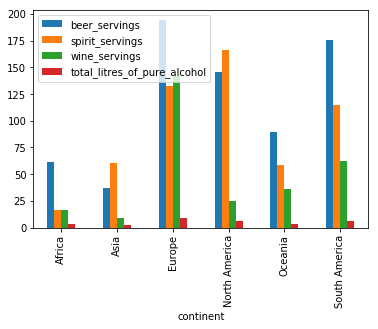

In [103]:
data.plot(kind='bar')

In [2]:
# Exploring pandas Series

url = 'http://bit.ly/imdbratings'
movies = pd.read_csv(url)

movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [3]:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

In [4]:
# basic summary 
movies.genre.describe()

count       979
unique       16
top       Drama
freq        278
Name: genre, dtype: object

In [5]:
# frequency of different genres
movies.genre.value_counts()

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Thriller       5
Sci-Fi         5
Film-Noir      3
Family         2
Fantasy        1
History        1
Name: genre, dtype: int64

In [6]:
# turn raw counts into percentages
movies.genre.value_counts(normalize=True)

Drama        0.283963
Comedy       0.159346
Action       0.138917
Crime        0.126660
Biography    0.078652
Adventure    0.076609
Animation    0.063330
Horror       0.029622
Mystery      0.016343
Western      0.009193
Thriller     0.005107
Sci-Fi       0.005107
Film-Noir    0.003064
Family       0.002043
Fantasy      0.001021
History      0.001021
Name: genre, dtype: float64

In [7]:
type(movies.genre.value_counts(normalize=True))

pandas.core.series.Series

In [8]:
# finding out unique values
movies.genre.unique()

array(['Crime', 'Action', 'Drama', 'Western', 'Adventure', 'Biography',
       'Comedy', 'Animation', 'Mystery', 'Horror', 'Film-Noir', 'Sci-Fi',
       'History', 'Thriller', 'Family', 'Fantasy'], dtype=object)

In [9]:
# number of unique values
movies.genre.nunique()

16

In [10]:
# crosstab is useful for explorng the data further
pd.crosstab(movies.genre, movies.content_rating)

content_rating,APPROVED,G,GP,NC-17,NOT RATED,PASSED,PG,PG-13,R,TV-MA,UNRATED,X
genre,,,,,,,,,,,,
Action,3,1,1,0,4,1,11,44,67,0,3,0
Adventure,3,2,0,0,5,1,21,23,17,0,2,0
Animation,3,20,0,0,3,0,25,5,5,0,1,0
Biography,1,2,1,0,1,0,6,29,36,0,0,0
Comedy,9,2,1,1,16,3,23,23,73,0,4,1
Crime,6,0,0,1,7,1,6,4,87,0,11,1
Drama,12,3,0,4,24,1,25,55,143,1,9,1
Family,0,1,0,0,0,0,1,0,0,0,0,0
Fantasy,0,0,0,0,0,0,0,0,1,0,0,0


In [11]:
movies.duration.describe()

count    979.000000
mean     120.979571
std       26.218010
min       64.000000
25%      102.000000
50%      117.000000
75%      134.000000
max      242.000000
Name: duration, dtype: float64

In [12]:
movies.duration.mean()

120.97957099080695

In [13]:
movies.duration.max()

242

In [14]:
movies.duration.min()

64

In [15]:
movies.duration.value_counts()

112    23
113    22
102    20
101    20
129    19
120    18
105    18
126    18
98     18
130    18
100    17
121    17
116    17
124    16
122    16
118    16
115    16
96     16
104    16
110    16
107    16
109    16
119    15
114    15
99     15
108    15
94     14
117    14
106    14
93     14
       ..
70      1
69      1
67      1
66      1
242     1
238     1
195     1
229     1
224     1
220     1
216     1
212     1
207     1
205     1
202     1
201     1
200     1
194     1
159     1
193     1
187     1
186     1
184     1
183     1
182     1
180     1
177     1
168     1
166     1
64      1
Name: duration, Length: 133, dtype: int64

In [16]:
# Visualization

%matplotlib inline
data = movies.duration
data

0      142
1      175
2      200
3      152
4      154
5       96
6      161
7      201
8      195
9      139
10     178
11     148
12     124
13     142
14     179
15     169
16     133
17     207
18     146
19     121
20     136
21     130
22     130
23     106
24     127
25     116
26     175
27     118
28     110
29      87
      ... 
949    103
950    108
951    105
952    117
953    102
954    104
955    157
956    104
957     98
958    109
959     96
960    103
961    114
962     99
963    118
964    150
965    105
966     87
967    136
968    162
969    109
970    107
971     90
972    112
973    126
974    116
975    118
976    138
977    114
978    126
Name: duration, Length: 979, dtype: int64

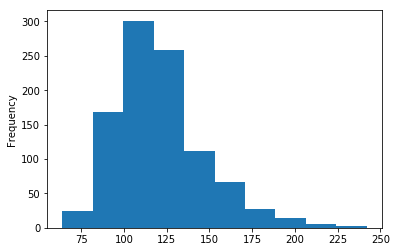

In [17]:
data.plot(kind='hist')

In [18]:
data_counts = movies.genre.value_counts()
data_counts

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Thriller       5
Sci-Fi         5
Film-Noir      3
Family         2
Fantasy        1
History        1
Name: genre, dtype: int64

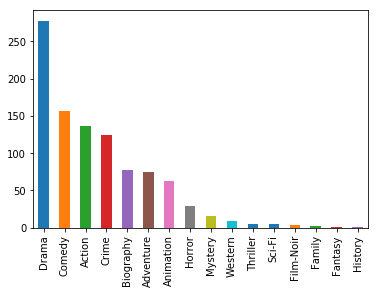

In [19]:
data_counts.plot(kind='bar')

In [20]:
# Handling Missing Values

url = 'http://bit.ly/uforeports'
ufo = pd.read_csv(url)

ufo.tail()

,City,Colors Reported,Shape Reported,State,Time
18236,Grant Park,NaN,TRIANGLE,IL,12/31/2000 23:00
18237,Spirit Lake,NaN,DISK,IA,12/31/2000 23:00
18238,Eagle River,NaN,NaN,WI,12/31/2000 23:45
18239,Eagle River,RED,LIGHT,WI,12/31/2000 23:45
18240,Ybor,NaN,OVAL,FL,12/31/2000 23:59


In [21]:
# checking which are NaN (True) using isnull
# creates DataFrame of True's and False's
ufo.isnull().tail()

,City,Colors Reported,Shape Reported,State,Time
18236,False,True,False,False,False
18237,False,True,False,False,False
18238,False,True,True,False,False
18239,False,False,False,False,False
18240,False,True,False,False,False


In [22]:
ufo.notnull().tail()

,City,Colors Reported,Shape Reported,State,Time
18236,True,False,True,True,True
18237,True,False,True,True,True
18238,True,False,False,True,True
18239,True,True,True,True,True
18240,True,False,True,True,True


In [23]:
# count number of missing values in each column
# sum True's
ufo.isnull().sum()

City                  25
Colors Reported    15359
Shape Reported      2644
State                  0
Time                   0
dtype: int64

In [25]:
ufo[ufo.City.isnull()]

,City,Colors Reported,Shape Reported,State,Time
21,NaN,NaN,NaN,LA,8/15/1943 0:00
22,NaN,NaN,LIGHT,LA,8/15/1943 0:00
204,NaN,NaN,DISK,CA,7/15/1952 12:30
241,NaN,BLUE,DISK,MT,7/4/1953 14:00
613,NaN,NaN,DISK,NV,7/1/1960 12:00
1877,NaN,YELLOW,CIRCLE,AZ,8/15/1969 1:00
2013,NaN,NaN,NaN,NH,8/1/1970 9:30
2546,NaN,NaN,FIREBALL,OH,10/25/1973 23:30
3123,NaN,RED,TRIANGLE,WV,11/25/1975 23:00
4736,NaN,NaN,SPHERE,CA,6/23/1982 23:00


In [26]:
# Method 1: Drop Missing Values

ufo.shape

(18241, 5)

In [27]:
# drop rows if any of the 5 columns have a missing value
# how='any' is the default, you need not include this
ufo.dropna(how='any').shape

(2486, 5)

In [28]:
# drop row if all of the columns are missing
ufo.dropna(how='all').shape

(18241, 5)

In [29]:
# drop row if either City or Shape Reported are missing
ufo.dropna(subset=['City', 'Shape Reported'], how='any').shape

(15576, 5)

In [30]:
# drop row if both City and Shape Reported are missing
ufo.dropna(subset=['City', 'Shape Reported'], how='all').shape

(18237, 5)

In [31]:
# Method 2: Filling missing values

# this shows missing values (NaN)
ufo['Shape Reported'].value_counts(dropna=False)

LIGHT        2803
NaN          2644
DISK         2122
TRIANGLE     1889
OTHER        1402
CIRCLE       1365
SPHERE       1054
FIREBALL     1039
OVAL          845
CIGAR         617
FORMATION     434
VARIOUS       333
RECTANGLE     303
CYLINDER      294
CHEVRON       248
DIAMOND       234
EGG           197
FLASH         188
TEARDROP      119
CONE           60
CROSS          36
DELTA           7
CRESCENT        2
ROUND           2
HEXAGON         1
PYRAMID         1
FLARE           1
DOME            1
Name: Shape Reported, dtype: int64

In [33]:
# inplace=True makes the change to the data
ufo['Shape Reported'].fillna(value='VARIOUS', inplace=True)

ufo['Shape Reported'].value_counts(dropna=False)

VARIOUS      2977
LIGHT        2803
DISK         2122
TRIANGLE     1889
OTHER        1402
CIRCLE       1365
SPHERE       1054
FIREBALL     1039
OVAL          845
CIGAR         617
FORMATION     434
RECTANGLE     303
CYLINDER      294
CHEVRON       248
DIAMOND       234
EGG           197
FLASH         188
TEARDROP      119
CONE           60
CROSS          36
DELTA           7
ROUND           2
CRESCENT        2
HEXAGON         1
PYRAMID         1
FLARE           1
DOME            1
Name: Shape Reported, dtype: int64

In [38]:
# Using Pandas Index

url = 'http://bit.ly/drinksbycountry'
drinks = pd.read_csv(url)

drinks

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa
5,Antigua & Barbuda,102,128,45,4.9,North America
6,Argentina,193,25,221,8.3,South America
7,Armenia,21,179,11,3.8,Europe
8,Australia,261,72,212,10.4,Oceania
9,Austria,279,75,191,9.7,Europe


In [35]:
drinks.index

RangeIndex(start=0, stop=193, step=1)

In [36]:
drinks.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [39]:
drinks.shape

(193, 6)

In [40]:
# you can identify what rows we are working with here
drinks[drinks.continent=='South America']

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
6,Argentina,193,25,221,8.3,South America
20,Bolivia,167,41,8,3.8,South America
23,Brazil,245,145,16,7.2,South America
35,Chile,130,124,172,7.6,South America
37,Colombia,159,76,3,4.2,South America
52,Ecuador,162,74,3,4.2,South America
72,Guyana,93,302,1,7.1,South America
132,Paraguay,213,117,74,7.3,South America
133,Peru,163,160,21,6.1,South America
163,Suriname,128,178,7,5.6,South America


In [41]:
# .loc method to retrieve element/cell
drinks.loc[23, 'beer_servings']

245

In [42]:
# inplace=True makes the change 
# sets the index to 'country'
drinks.set_index('country', inplace=True)
drinks.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
country,,,,,
Afghanistan,0,0,0,0.0,Asia
Albania,89,132,54,4.9,Europe
Algeria,25,0,14,0.7,Africa
Andorra,245,138,312,12.4,Europe
Angola,217,57,45,5.9,Africa


In [43]:
drinks.index

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua & Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
       ...
       'Tanzania', 'USA', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela',
       'Vietnam', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='country', length=193)

In [44]:
# country is no longer one of the columns
drinks.columns

Index(['beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [45]:
# we can select based on country instead of a number 
# we can select more easily by setting a meaningful index
drinks.loc['Brazil', 'beer_servings']

245

In [46]:
# clearing index name
drinks.index.name = None
drinks.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
Afghanistan,0,0,0,0.0,Asia
Albania,89,132,54,4.9,Europe
Algeria,25,0,14,0.7,Africa
Andorra,245,138,312,12.4,Europe
Angola,217,57,45,5.9,Africa


In [47]:
# say you prefer to use the default index and you want back the column of countries
drinks.index.name = 'country'
drinks.reset_index(inplace=True)
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [48]:
# Alignment
drinks.continent.head()

0      Asia
1    Europe
2    Africa
3    Europe
4    Africa
Name: continent, dtype: object

In [49]:
drinks.continent.value_counts().values

array([53, 45, 44, 23, 16, 12])

In [50]:
# we can use the index to select values from the series
# this is similar to .loc for DataFrame
# because series does not have multiple columns, we can do this
drinks.continent.value_counts()['Africa']

53

In [51]:
# sort based on values in the Series
drinks.continent.value_counts().sort_values()

South America    12
Oceania          16
North America    23
Asia             44
Europe           45
Africa           53
Name: continent, dtype: int64

In [52]:
# sort index based on ascending order
drinks.continent.value_counts().sort_index()

Africa           53
Asia             44
Europe           45
North America    23
Oceania          16
South America    12
Name: continent, dtype: int64

In [57]:
# creating a a pandas series
people = pd.Series([3000000, 85000], index=[1, 2], name='population')
people

1    3000000
2      85000
Name: population, dtype: int64

In [58]:
drinks.beer_servings.head()

0      0
1     89
2     25
3    245
4    217
Name: beer_servings, dtype: int64

In [59]:
# you can do math based on shared index
drinks.beer_servings * people

0              NaN
1      267000000.0
2        2125000.0
3              NaN
4              NaN
5              NaN
6              NaN
7              NaN
8              NaN
9              NaN
10             NaN
11             NaN
12             NaN
13             NaN
14             NaN
15             NaN
16             NaN
17             NaN
18             NaN
19             NaN
20             NaN
21             NaN
22             NaN
23             NaN
24             NaN
25             NaN
26             NaN
27             NaN
28             NaN
29             NaN
          ...     
163            NaN
164            NaN
165            NaN
166            NaN
167            NaN
168            NaN
169            NaN
170            NaN
171            NaN
172            NaN
173            NaN
174            NaN
175            NaN
176            NaN
177            NaN
178            NaN
179            NaN
180            NaN
181            NaN
182            NaN
183            NaN
184         

In [60]:
# axis=1, column concatenation
# beauty of automatic alignment using index
pd.concat([drinks, people], axis=1).head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,population
0,Afghanistan,0,0,0,0.0,Asia,NaN
1,Albania,89,132,54,4.9,Europe,3000000.0
2,Algeria,25,0,14,0.7,Africa,85000.0
3,Andorra,245,138,312,12.4,Europe,NaN
4,Angola,217,57,45,5.9,Africa,NaN


In [61]:
# Selecting Multiple Rows and Columns

url = 'http://bit.ly/uforeports'
ufo = pd.read_csv(url)

# show first 3 shows
ufo.head(3)

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00


In [63]:
# .loc DataFrame method
# filtering rows and selecting columns by label

# format
# ufo.loc[rows, columns]

# row 0, all columns
ufo.loc[0, :]

City                       Ithaca
Colors Reported               NaN
Shape Reported           TRIANGLE
State                          NY
Time               6/1/1930 22:00
Name: 0, dtype: object

In [64]:
# rows 0, 1, 2
# all columns

ufo.loc[[0, 1, 2], :]

# more efficient code
ufo.loc[0:2, :]

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00


In [65]:
# all rows
# column: City
ufo.loc[:, 'City']

0                      Ithaca
1                 Willingboro
2                     Holyoke
3                     Abilene
4        New York Worlds Fair
5                 Valley City
6                 Crater Lake
7                        Alma
8                     Eklutna
9                     Hubbard
10                    Fontana
11                   Waterloo
12                     Belton
13                     Keokuk
14                  Ludington
15                Forest Home
16                Los Angeles
17                  Hapeville
18                     Oneida
19                 Bering Sea
20                   Nebraska
21                        NaN
22                        NaN
23                  Owensboro
24                 Wilderness
25                  San Diego
26                 Wilderness
27                     Clovis
28                 Los Alamos
29               Ft. Duschene
                 ...         
18211                 Holyoke
18212                  Carson
18213     

In [66]:
# all rows
# column: City, State
ufo.loc[:, ['City', 'State']]

# similar code for City through State
ufo.loc[:, 'City':'State']

,City,Colors Reported,Shape Reported,State
0,Ithaca,NaN,TRIANGLE,NY
1,Willingboro,NaN,OTHER,NJ
2,Holyoke,NaN,OVAL,CO
3,Abilene,NaN,DISK,KS
4,New York Worlds Fair,NaN,LIGHT,NY
5,Valley City,NaN,DISK,ND
6,Crater Lake,NaN,CIRCLE,CA
7,Alma,NaN,DISK,MI
8,Eklutna,NaN,CIGAR,AK
9,Hubbard,NaN,CYLINDER,OR


In [67]:
# multiple rows and multiple columns
ufo.loc[0:2, 'City':'State']

,City,Colors Reported,Shape Reported,State
0,Ithaca,NaN,TRIANGLE,NY
1,Willingboro,NaN,OTHER,NJ
2,Holyoke,NaN,OVAL,CO


In [68]:
# filter using City=='Oakland'
ufo[ufo.City=='Oakland']

,City,Colors Reported,Shape Reported,State,Time
1694,Oakland,NaN,CIGAR,CA,7/21/1968 14:00
2144,Oakland,NaN,DISK,CA,8/19/1971 0:00
4686,Oakland,NaN,LIGHT,MD,6/1/1982 0:00
7293,Oakland,NaN,LIGHT,CA,3/28/1994 17:00
8488,Oakland,NaN,NaN,CA,8/10/1995 21:45
8768,Oakland,NaN,NaN,CA,10/10/1995 22:40
10816,Oakland,NaN,LIGHT,OR,10/1/1997 21:30
10948,Oakland,NaN,DISK,CA,11/14/1997 19:55
11045,Oakland,NaN,TRIANGLE,CA,12/10/1997 1:30
12322,Oakland,NaN,FIREBALL,CA,10/9/1998 19:40


In [69]:
# easier-to-read code
# here you specify the rows and columns you want
# ufo.loc[rows, columns]

ufo.loc[ufo.City=='Oakland', :]

,City,Colors Reported,Shape Reported,State,Time
1694,Oakland,NaN,CIGAR,CA,7/21/1968 14:00
2144,Oakland,NaN,DISK,CA,8/19/1971 0:00
4686,Oakland,NaN,LIGHT,MD,6/1/1982 0:00
7293,Oakland,NaN,LIGHT,CA,3/28/1994 17:00
8488,Oakland,NaN,NaN,CA,8/10/1995 21:45
8768,Oakland,NaN,NaN,CA,10/10/1995 22:40
10816,Oakland,NaN,LIGHT,OR,10/1/1997 21:30
10948,Oakland,NaN,DISK,CA,11/14/1997 19:55
11045,Oakland,NaN,TRIANGLE,CA,12/10/1997 1:30
12322,Oakland,NaN,FIREBALL,CA,10/9/1998 19:40


In [70]:
# again, specifying the rows and columns you want
# this would be the best way to do it compared to chain indexing 
ufo.loc[ufo.City=='Oakland', 'State']

1694     CA
2144     CA
4686     MD
7293     CA
8488     CA
8768     CA
10816    OR
10948    CA
11045    CA
12322    CA
12941    CA
16803    MD
17322    CA
Name: State, dtype: object

In [71]:
ufo.iloc[:, [0, 3]]

,City,State
0,Ithaca,NY
1,Willingboro,NJ
2,Holyoke,CO
3,Abilene,KS
4,New York Worlds Fair,NY
5,Valley City,ND
6,Crater Lake,CA
7,Alma,MI
8,Eklutna,AK
9,Hubbard,OR


In [72]:
# iloc excludes 4 (compared to loc where it includes 4)
# iloc includes 0
ufo.iloc[:, 0:4]

,City,Colors Reported,Shape Reported,State
0,Ithaca,NaN,TRIANGLE,NY
1,Willingboro,NaN,OTHER,NJ
2,Holyoke,NaN,OVAL,CO
3,Abilene,NaN,DISK,KS
4,New York Worlds Fair,NaN,LIGHT,NY
5,Valley City,NaN,DISK,ND
6,Crater Lake,NaN,CIRCLE,CA
7,Alma,NaN,DISK,MI
8,Eklutna,NaN,CIGAR,AK
9,Hubbard,NaN,CYLINDER,OR


In [73]:
# this is the major difference
# exclusive of 3
ufo.iloc[0:3, :]

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00


In [76]:
# non-explicit code
ufo[['City', 'State']]

# explicit code
ufo.loc[:, ['City', 'State']]

,City,State
0,Ithaca,NY
1,Willingboro,NJ
2,Holyoke,CO
3,Abilene,KS
4,New York Worlds Fair,NY
5,Valley City,ND
6,Crater Lake,CA
7,Alma,MI
8,Eklutna,AK
9,Hubbard,OR


In [ ]:
# Using "inplace" parameter



In [83]:
url = 'http://bit.ly/uforeports'
ufo = pd.read_csv(url)
ufo.shape

ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [85]:
# dropping City column
ufo.drop('City', axis=1).head()

,Colors Reported,Shape Reported,State,Time
0,NaN,TRIANGLE,NY,6/1/1930 22:00
1,NaN,OTHER,NJ,6/30/1930 20:00
2,NaN,OVAL,CO,2/15/1931 14:00
3,NaN,DISK,KS,6/1/1931 13:00
4,NaN,LIGHT,NY,4/18/1933 19:00


In [86]:
# you can see that the City column is not gone 
# drop() method has inplace=False as default
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [87]:
# you want to change to inplace=True to affect the underlying data
ufo.drop('City', axis=1, inplace=True)

In [88]:
ufo.head()

,Colors Reported,Shape Reported,State,Time
0,NaN,TRIANGLE,NY,6/1/1930 22:00
1,NaN,OTHER,NJ,6/30/1930 20:00
2,NaN,OVAL,CO,2/15/1931 14:00
3,NaN,DISK,KS,6/1/1931 13:00
4,NaN,LIGHT,NY,4/18/1933 19:00


In [89]:
# dropna with how='any' would drop any row with 'NaN'
ufo.dropna(how='any').shape

(2490, 4)

In [90]:
ufo.shape
# as you can see, we lose a lot of rows because of dropna
# but the underlying data has not been affected because inplace=False for .dropna()

(18241, 4)

In [91]:
# you can not use inplace=True and use an assignment instead
ufo = ufo.set_index('Time')

In [92]:
ufo.tail()

,Colors Reported,Shape Reported,State
Time,,,
12/31/2000 23:00,NaN,TRIANGLE,IL
12/31/2000 23:00,NaN,DISK,IA
12/31/2000 23:45,NaN,NaN,WI
12/31/2000 23:45,RED,LIGHT,WI
12/31/2000 23:59,NaN,OVAL,FL


In [93]:
ufo.fillna(method='bfill').tail()

,Colors Reported,Shape Reported,State
Time,,,
12/31/2000 23:00,RED,TRIANGLE,IL
12/31/2000 23:00,RED,DISK,IA
12/31/2000 23:45,RED,LIGHT,WI
12/31/2000 23:45,RED,LIGHT,WI
12/31/2000 23:59,NaN,OVAL,FL


In [94]:
ufo.fillna(method='ffill').tail()

,Colors Reported,Shape Reported,State
Time,,,
12/31/2000 23:00,RED,TRIANGLE,IL
12/31/2000 23:00,RED,DISK,IA
12/31/2000 23:45,RED,DISK,WI
12/31/2000 23:45,RED,LIGHT,WI
12/31/2000 23:59,RED,OVAL,FL


In [95]:
# Making pandas DataFrame smaller and faster

url = 'http://bit.ly/drinksbycountry'
drinks = pd.read_csv(url)

drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [96]:
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
country                         193 non-null object
beer_servings                   193 non-null int64
spirit_servings                 193 non-null int64
wine_servings                   193 non-null int64
total_litres_of_pure_alcohol    193 non-null float64
continent                       193 non-null object
dtypes: float64(1), int64(3), object(2)
memory usage: 9.1+ KB


In [97]:
# we can count the actual memory usage using the following command
drinks.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
country                         193 non-null object
beer_servings                   193 non-null int64
spirit_servings                 193 non-null int64
wine_servings                   193 non-null int64
total_litres_of_pure_alcohol    193 non-null float64
continent                       193 non-null object
dtypes: float64(1), int64(3), object(2)
memory usage: 30.4 KB


In [98]:
# we can check how much space each column is actually taking
# the numbers are in bytes, not kilobytes
drinks.memory_usage(deep=True)

Index                              80
country                         12588
beer_servings                    1544
spirit_servings                  1544
wine_servings                    1544
total_litres_of_pure_alcohol     1544
continent                       12332
dtype: int64

In [99]:
type(drinks.memory_usage(deep=True))

pandas.core.series.Series

In [100]:
# since it is a series, we can use .sum()
drinks.memory_usage(deep=True).sum()

31176

In [101]:
# there are only 6 unique values of continent
# we can replace strings with digits to save space
sorted(drinks.continent.unique())

['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America']

In [102]:
drinks.continent.head()

0      Asia
1    Europe
2    Africa
3    Europe
4    Africa
Name: continent, dtype: object

In [104]:
# converting continent from object to category 
# it stores the strings as integers
drinks['continent'] = drinks.continent.astype('category')

In [105]:
drinks.dtypes

country                           object
beer_servings                      int64
spirit_servings                    int64
wine_servings                      int64
total_litres_of_pure_alcohol     float64
continent                       category
dtype: object

In [106]:
# .cat is similar to .str
# we can do more stuff after .cat
# we can see here how pandas represents the continents as integers
drinks.continent.cat.codes.head()

0    1
1    2
2    0
3    2
4    0
dtype: int8

In [107]:
# before this conversion, it was over 12332 bytes
# now it is 744 bytes
drinks.memory_usage(deep=True)

Index                              80
country                         12588
beer_servings                    1544
spirit_servings                  1544
wine_servings                    1544
total_litres_of_pure_alcohol     1544
continent                         744
dtype: int64

In [112]:
# passing a dictionary {} to the DataFrame method = 
id_list =[100, 101, 102, 103]
quality_list = ['good', 'very good', 'good', 'excellent']
df = pd.DataFrame({'ID': id_list, 'quality': quality_list })
df

,ID,quality
0,100,good
1,101,very good
2,102,good
3,103,excellent


In [113]:
# this sorts using alphabetical order
# but there is a logical ordering to these categories, we need to tell pandas there is a logical ordering
df.sort_values('quality')

,ID,quality
3,103,excellent
0,100,good
2,102,good
1,101,very good


In [114]:
# how do we tell pandas there is a logical order?
quality_list_ordered = ['good', 'very good', 'excellent']
df['quality'] = df.quality.astype('category', categories=quality_list_ordered, ordered=True)

/home/konstantinos/anaconda3/envs/my_env/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [116]:
# now it sorts using the logical order we defined
df.sort_values('quality')

,ID,quality
0,100,good
2,102,good
1,101,very good
3,103,excellent


In [117]:
# we can now use boolean conditions with this
# here we want all columns where the row > good
df.loc[df.quality > 'good', :]

,ID,quality
1,101,very good
3,103,excellent


In [118]:
# Using pandas with scikit-learn to create Kaggle submissions

url = 'http://bit.ly/kaggletrain'
train = pd.read_csv(url)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [119]:
# Pclass: passenger class
# Parch: parents and children
feature_cols = ['Pclass', 'Parch']

In [120]:
# you want all rows, and the feature_cols' columns
X = train.loc[:, feature_cols]

In [121]:
X.shape

(891, 2)

In [122]:
# now we want to create our response vector
y = train.Survived

In [123]:
y.shape

(891,)

In [124]:
# Build scikit-learn model
# 1. import
from sklearn.linear_model import LogisticRegression

# 2. instantiate model
logreg = LogisticRegression()

# 3. fit 
logreg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [125]:
url_test = 'http://bit.ly/kaggletest'
test = pd.read_csv(url_test)

In [126]:
# missing Survived column because we are predicting
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [127]:
X_new = test.loc[:, feature_cols]

In [128]:
X_new.shape

(418, 2)

In [129]:
# 4. predict
new_pred_class = logreg.predict(X_new)

In [130]:
# Save DataFrame to csv

# kaggle wants 2 columns
# new_pred_class
# PassengerId

# pandas would align them next to each other
# to ensure the first column is PassengerId, use .set_index
kaggle_data = pd.DataFrame({'PassengerId':test.PassengerId, 'Survived':new_pred_class}).set_index('PassengerId')
kaggle_data.to_csv('sub.csv')

In [131]:
# save train data to disk using pickle
train.to_pickle('train.pkl')

In [132]:
# read data
pd.read_pickle('train.pkl')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [133]:
# Randomly sample rows from a DataFrame

link = 'http://bit.ly/uforeports'
ufo = pd.read_csv(link)

ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [136]:
# to get 3 random rows
# each time you run this, you would have 3 different rows
ufo.sample(n=3)

,City,Colors Reported,Shape Reported,State,Time
14345,Matthews,NaN,CHEVRON,NC,8/31/1999 23:30
10220,Las Vegas,ORANGE,LIGHT,NV,5/9/1997 21:00
7242,Green Bay,NaN,DISK,WI,12/15/1993 2:00


In [138]:
# you can use random_state for reproducibility
ufo.sample(n=3, random_state=2)

,City,Colors Reported,Shape Reported,State,Time
7236,Mesquite,NaN,OTHER,NV,11/25/1993 15:00
14432,Pittsburg,NaN,OTHER,CA,9/4/1999 0:38
4559,Mondel,NaN,NaN,NM,6/18/1981 3:00


In [141]:
# fraction of rows
# here you get 75% of the rows
ufo.sample(frac=0.75, random_state=99)

,City,Colors Reported,Shape Reported,State,Time
6250,Sunnyvale,NaN,OTHER,CA,12/16/1989 0:00
8656,Corpus Christi,NaN,NaN,TX,9/13/1995 0:10
2729,Mentor,NaN,DISK,OH,8/8/1974 10:00
7348,Wilson,NaN,LIGHT,WI,6/1/1994 1:00
12637,Lowell,NaN,CIRCLE,MA,11/26/1998 10:00
2094,Victorville,NaN,LIGHT,CA,6/6/1971 21:00
15905,Black Canyon City,BLUE,CIRCLE,AZ,2/16/2000 4:45
6792,Houston,NaN,CHEVRON,TX,6/10/1992 23:00
5063,Ely,NaN,DIAMOND,MN,6/15/1984 19:00
16626,Atlantic Ocean,NaN,NaN,NC,6/17/2000 0:35


In [143]:
train = ufo.sample(frac=0.75, random_state=99)

# you can't simply split 0.75 and 0.25 without overlapping
# this code tries to find that train = 75% and test = 25%
test = ufo.loc[~ufo.index.isin(train.index), :]

In [144]:
# Creating Dummy Variables

url = 'http://bit.ly/kaggletrain'
train = pd.read_csv(url)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [147]:
# using .map to create dummy variables
# train['category_name'] = train.Category.map({'unique_term':0, 'unique_term2':1})
train['Sex_male'] = train.Sex.map({'female':0, 'male':1})

In [148]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [149]:
pd.get_dummies(train.Sex)

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
5,0,1
6,0,1
7,0,1
8,1,0
9,1,0


In [150]:
# If you have k unique terms, you use k - 1 dummy variables to represent

# iloc works on positions (integers)
# this iloc code would always work for any number and name of categories
pd.get_dummies(train.Sex, prefix='Sex').iloc[:, 1:]

# alternative using loc that works on labels
# this method has to be modified for each dataset
pd.get_dummies(train.Sex, prefix='Sex').loc[:, 'Sex_male':]

,Sex_male
0,1
1,0
2,0
3,0
4,1
5,1
6,1
7,1
8,0
9,0


In [151]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [153]:
# As we can see here, there are 3 unique terms
# we only need k - 1, hence 2 dummy variables here
pd.get_dummies(train.Embarked, prefix='Embarked').iloc[:, 1:]

,Embarked_Q,Embarked_S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
5,1,0
6,0,1
7,0,1
8,0,1
9,0,0


In [154]:
embarked_dummies = pd.get_dummies(train.Embarked, prefix='Embarked').iloc[:, 1:]

In [155]:
# concatenate columns
# axis=1
pd.concat([train, embarked_dummies], axis=1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0,1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1,1,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,1,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,0,0,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,0,0,0


In [156]:
# create dummy variables for multiple categories
# drop_first=True handles k - 1 
pd.get_dummies(train, columns=['Sex', 'Embarked'], drop_first=True)

# this drops original Sex and Embarked columns
# and creates dummy variables

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,1,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,1,1,0,1
5,6,0,3,"Moran, Mr. James",NaN,0,0,330877,8.4583,NaN,1,1,1,0
6,7,0,1,"McCarthy, Mr. Timothy J",54.0,0,0,17463,51.8625,E46,1,1,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",2.0,3,1,349909,21.0750,NaN,1,1,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0,0,2,347742,11.1333,NaN,0,0,0,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",14.0,1,0,237736,30.0708,NaN,0,0,0,0


In [157]:
# Working with Date and Time

url = 'http://bit.ly/uforeports'
ufo = pd.read_csv(url)

ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [158]:
ufo.dtypes

City               object
Colors Reported    object
Shape Reported     object
State              object
Time               object
dtype: object

In [159]:
# 5 characters from the end to 3 characters from the end
# this is quite a chore
ufo.Time.str.slice(-5, -3).astype(int).head()

0    22
1    20
2    14
3    13
4    19
Name: Time, dtype: int64

In [160]:
# we will convert the Time column to datatime format
# there are many options to ensure this works well with your data
ufo['Time'] = pd.to_datetime(ufo.Time)
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00


In [161]:
ufo.dtypes

City                       object
Colors Reported            object
Shape Reported             object
State                      object
Time               datetime64[ns]
dtype: object

In [162]:
ufo.Time.dt.hour.head()

0    22
1    20
2    14
3    13
4    19
Name: Time, dtype: int64

In [163]:
ufo.Time.dt.weekday_name.head()

0     Sunday
1     Monday
2     Sunday
3     Monday
4    Tuesday
Name: Time, dtype: object

In [164]:
ufo.Time.dt.dayofyear.head()

0    152
1    181
2     46
3    152
4    108
Name: Time, dtype: int64

In [166]:
# Timestamps: We can use it for comparison and mathematical operations

ts = pd.to_datetime('1/1/1999')
ufo.loc[ufo.Time >= ts, :].head()

,City,Colors Reported,Shape Reported,State,Time
12832,Loma Rica,NaN,LIGHT,CA,1999-01-01 02:30:00
12833,Bauxite,NaN,NaN,AR,1999-01-01 03:00:00
12834,Florence,NaN,CYLINDER,SC,1999-01-01 14:00:00
12835,Lake Henshaw,NaN,CIGAR,CA,1999-01-01 15:00:00
12836,Wilmington Island,NaN,LIGHT,GA,1999-01-01 17:15:00


In [167]:
ufo.Time.max()

Timestamp('2000-12-31 23:59:00')

In [168]:
ufo.Time.max() - ufo.Time.min()

Timedelta('25781 days 01:59:00')

In [169]:
(ufo.Time.max() - ufo.Time.min()).days

25781

In [170]:
# Plotting

%matplotlib inline

ufo['Year'] = ufo.Time.dt.year

ufo.head()

,City,Colors Reported,Shape Reported,State,Time,Year
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00,1930
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00,1930
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00,1931
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00,1931
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00,1933


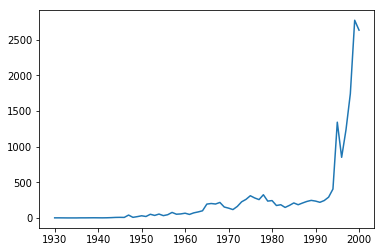

In [171]:
ufo.Year.value_counts().sort_index().plot()

In [173]:
# Removing duplicate rows

# read a dataset of movie reviewers (modifying the default parameter values for read_table)
user_cols = ['user_id', 'age', 'gender', 'occupation', 'zip_code']
url = 'http://bit.ly/movieusers'
users = pd.read_table(url, sep='|', header=None, names=user_cols, index_col='user_id')

users.head()

,age,gender,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213


In [174]:
users.shape

(943, 4)

In [175]:
# If we want to identify duplicate zip_code rows

# use df.cat_name.duplicated()
# output True if row above is the same
users.zip_code.duplicated()

user_id
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29      True
30     False
       ...  
914    False
915    False
916    False
917    False
918    False
919     True
920    False
921    False
922     True
923    False
924    False
925    False
926    False
927    False
928     True
929     True
930    False
931    False
932    False
933    False
934     True
935    False
936    False
937     True
938    False
939    False
940     True
941    False
942    False
943    False
Name: zip_code, Length: 943, dtype: bool

In [176]:
# type
type(users.zip_code.duplicated())

pandas.core.series.Series

In [177]:
# we can use .count() since it's a series
# there're 148 duplicates
users.zip_code.duplicated().sum()

148

In [178]:
# it will output True if entire row is duplicated (row above)
users.duplicated()

user_id
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
30     False
       ...  
914    False
915    False
916    False
917    False
918    False
919    False
920    False
921    False
922    False
923    False
924    False
925    False
926    False
927    False
928    False
929    False
930    False
931    False
932    False
933    False
934    False
935    False
936    False
937    False
938    False
939    False
940    False
941    False
942    False
943    False
Length: 943, dtype: bool

In [179]:
# examine duplicated rows
users.loc[users.duplicated(), :]

,age,gender,occupation,zip_code
user_id,,,,
496,21,F,student,55414
572,51,M,educator,20003
621,17,M,student,60402
684,28,M,student,55414
733,44,F,other,60630
805,27,F,other,20009
890,32,M,student,97301


In [180]:
# keep='first'
# mark duplicates as True except for the first occurence
users.loc[users.duplicated(keep='first'), :]

,age,gender,occupation,zip_code
user_id,,,,
496,21,F,student,55414
572,51,M,educator,20003
621,17,M,student,60402
684,28,M,student,55414
733,44,F,other,60630
805,27,F,other,20009
890,32,M,student,97301


In [181]:
 keep='last'
# 7 rows that are counted as duplicates, keeping the later one

# this is useful for splitting the data
users.loc[users.duplicated(keep='last'), :]

,age,gender,occupation,zip_code
user_id,,,,
67,17,M,student,60402
85,51,M,educator,20003
198,21,F,student,55414
350,32,M,student,97301
428,28,M,student,55414
437,27,F,other,20009
460,44,F,other,60630


In [182]:
# mark all duplicates as True
# this combines the two tables above
users.loc[users.duplicated(keep=False), :]

,age,gender,occupation,zip_code
user_id,,,,
67,17,M,student,60402
85,51,M,educator,20003
198,21,F,student,55414
350,32,M,student,97301
428,28,M,student,55414
437,27,F,other,20009
460,44,F,other,60630
496,21,F,student,55414
572,51,M,educator,20003


In [183]:
# drops the 7 rows
users.drop_duplicates(keep='first').shape

(936, 4)

In [184]:
# drops the last version of the 7 duplicate rows
users.drop_duplicates(keep='last').shape

(936, 4)

In [185]:
# drops all 14 rows
users.drop_duplicates(keep=False).shape

(929, 4)

In [186]:
# only consider "age" and "zip_code" as the relevant columns
users.duplicated(subset=['age', 'zip_code']).sum()

16

In [187]:
# Filtering and Converting Series to NaN

url = 'http://bit.ly/imdbratings'
movies = pd.read_csv(url)

movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [188]:
# counting missing values
movies.content_rating.isnull().sum()

3

In [189]:
movies.loc[movies.content_rating.isnull(), :]

,star_rating,title,content_rating,genre,duration,actors_list
187,8.2,Butch Cassidy and the Sundance Kid,NaN,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin..."
649,7.7,Where Eagles Dare,NaN,Action,158,"[u'Richard Burton', u'Clint Eastwood', u'Mary ..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


In [191]:
# counting content_rating unique values
# you can see there're 65 'NOT RATED' and 3 'NaN'
# we want to combine all to make 68 NaN
movies.content_rating.value_counts(dropna=False)

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
NC-17          7
PASSED         7
X              4
GP             3
NaN            3
TV-MA          1
Name: content_rating, dtype: int64

In [192]:
# examining content_rating's 'NOT RATED'
movies.loc[movies.content_rating=='NOT RATED', :]

,star_rating,title,content_rating,genre,duration,actors_list
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
6,8.9,"The Good, the Bad and the Ugly",NOT RATED,Western,161,"[u'Clint Eastwood', u'Eli Wallach', u'Lee Van ..."
41,8.5,Sunset Blvd.,NOT RATED,Drama,110,"[u'William Holden', u'Gloria Swanson', u'Erich..."
63,8.4,M,NOT RATED,Crime,99,"[u'Peter Lorre', u'Ellen Widmann', u'Inge Land..."
66,8.4,Munna Bhai M.B.B.S.,NOT RATED,Comedy,156,"[u'Sunil Dutt', u'Sanjay Dutt', u'Arshad Warsi']"
72,8.4,Rang De Basanti,NOT RATED,Drama,157,"[u'Aamir Khan', u'Soha Ali Khan', u'Siddharth']"
83,8.4,To Kill a Mockingbird,NOT RATED,Drama,129,"[u'Gregory Peck', u'John Megna', u'Frank Overt..."
87,8.4,Bicycle Thieves,NOT RATED,Drama,93,"[u'Lamberto Maggiorani', u'Enzo Staiola', u'Li..."
88,8.4,The Kid,NOT RATED,Comedy,68,"[u'Charles Chaplin', u'Edna Purviance', u'Jack..."
89,8.4,Swades,NOT RATED,Drama,189,"[u'Shah Rukh Khan', u'Gayatri Joshi', u'Kishor..."


In [193]:
# filtering only 1 column
movies.loc[movies.content_rating=='NOT RATED', 'content_rating']

5      NOT RATED
6      NOT RATED
41     NOT RATED
63     NOT RATED
66     NOT RATED
72     NOT RATED
83     NOT RATED
87     NOT RATED
88     NOT RATED
89     NOT RATED
93     NOT RATED
100    NOT RATED
104    NOT RATED
105    NOT RATED
108    NOT RATED
109    NOT RATED
111    NOT RATED
116    NOT RATED
122    NOT RATED
128    NOT RATED
132    NOT RATED
133    NOT RATED
134    NOT RATED
140    NOT RATED
149    NOT RATED
165    NOT RATED
167    NOT RATED
169    NOT RATED
174    NOT RATED
178    NOT RATED
         ...    
215    NOT RATED
231    NOT RATED
234    NOT RATED
246    NOT RATED
252    NOT RATED
254    NOT RATED
255    NOT RATED
263    NOT RATED
265    NOT RATED
315    NOT RATED
328    NOT RATED
343    NOT RATED
405    NOT RATED
419    NOT RATED
427    NOT RATED
453    NOT RATED
478    NOT RATED
481    NOT RATED
491    NOT RATED
528    NOT RATED
531    NOT RATED
546    NOT RATED
573    NOT RATED
592    NOT RATED
647    NOT RATED
665    NOT RATED
673    NOT RATED
763    NOT RAT

In [194]:
import numpy as np

type(movies.loc[movies.content_rating=='NOT RATED', 'content_rating'])

pandas.core.series.Series

In [195]:
# there's no error here
# however, if you use other methods of slicing, it would output an error

# equating this series to np.nan converts all to 'NaN'
movies.loc[movies.content_rating=='NOT RATED', 'content_rating'] = np.nan

In [196]:
# it has changed from 65 to 68
movies.content_rating.isnull().sum()

68

In [197]:
# Changing display options

url = 'http://bit.ly/drinksbycountry'
drinks = pd.read_csv(url)

# this shows only the first and last 30 rows
drinks

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa
5,Antigua & Barbuda,102,128,45,4.9,North America
6,Argentina,193,25,221,8.3,South America
7,Armenia,21,179,11,3.8,Europe
8,Australia,261,72,212,10.4,Oceania
9,Austria,279,75,191,9.7,Europe


In [198]:
# to show all rows go to the documentation Pandas.get_option

# use display.max_rows
# this is the default
pd.get_option('display.max_rows')

60

In [199]:
# let's change to set_option to change
# be careful if you've many rows
pd.set_option('display.max_rows', None)

In [200]:
drinks

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa
5,Antigua & Barbuda,102,128,45,4.9,North America
6,Argentina,193,25,221,8.3,South America
7,Armenia,21,179,11,3.8,Europe
8,Australia,261,72,212,10.4,Oceania
9,Austria,279,75,191,9.7,Europe


In [202]:
# Creating a DataFrame from Objects

# .DataFrame is a constructor

# create a dictionary
ex_dict = {
    'id': [100, 101, 102],
    'color': ['red', 'blue', 'red']
}

# create a list of strings
columns = ['id', 'color']

index = ['a', 'b', 'c']

# Passing a dictionary
# key: column name
# value: series of values
df = pd.DataFrame(ex_dict, columns=columns, index=index)
df

,id,color
a,100,red
b,101,blue
c,102,red


In [203]:
# list of lists
list_of_lists = [
    [100, 'red'],
    [101, 'blue'],
    [102, 'red']
]

# columns
columns = ['id', 'color']

pd.DataFrame(list_of_lists, columns=columns)

,id,color
0,100,red
1,101,blue
2,102,red


In [204]:
# create 4x2 random array 
# array is a list of lists
arr = np.random.rand(4, 2)
arr

array([[0.46760781, 0.62425117],
       [0.80697019, 0.30130194],
       [0.6040661 , 0.34096058],
       [0.90299308, 0.49400956]])

In [205]:
# columns
columns_new = ['one', 'two']

# pass in array and columns
pd.DataFrame(arr, columns=columns_new)

,one,two
0,0.467608,0.624251
1,0.806970,0.301302
2,0.604066,0.340961
3,0.902993,0.494010


In [206]:
# np.arange
# inclusive of start
# exclusive of end
# step: 1 
# ascending order

# np.random.randint
# 60 to 101
# any random integer

# key: column name
# value: series of values
dict_new = {
    'student': np.arange(100, 110, 1),
    'test': np.random.randint(60, 101, 10)
}

pd.DataFrame(dict_new)

,student,test
0,100,64
1,101,90
2,102,79
3,103,79
4,104,68
5,105,94
6,106,93
7,107,100
8,108,85
9,109,60


In [207]:
# we can set the index
pd.DataFrame(dict_new).set_index('student')

,test
student,
100,64
101,90
102,79
103,79
104,68
105,94
106,93
107,100
108,85


In [208]:
# creating a series

lst = ['round', 'square']
ind = ['c', 'b']
series_name = 'shape'

s = pd.Series(lst, index=ind, name=series_name)
s

c     round
b    square
Name: shape, dtype: object

In [209]:
df

,id,color
a,100,red
b,101,blue
c,102,red


In [211]:
# concatenate columns
# auto-alignment
df2 = pd.concat([df, s], axis=1, sort=False)
df2

,id,color,shape
a,100,red,NaN
b,101,blue,square
c,102,red,round


In [212]:
# say you want to add a value 'rectangle'
df2.loc['a', 'shape'] = 'rectangle'
df2

,id,color,shape
a,100,red,rectangle
b,101,blue,square
c,102,red,round


In [213]:
# Apply function to Series and DataFrame

url = 'http://bit.ly/kaggletrain'
train = pd.read_csv(url)
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [214]:
# map() function as a Series method. Mostly used for mapping categorical data to numerical data

# create new column
train['Sex_num'] = train.Sex.map({'female':0, 'male':1})

In [215]:
# let's compared Sex and Sex_num columns
# here we can see we map male to 1 and female to 0
train.loc[0:4, ['Sex', 'Sex_num']]

,Sex,Sex_num
0,male,1
1,female,0
2,female,0
3,female,0
4,male,1


In [216]:
# apply() function as a Series method. Applies a function to each element in the Series

# say we want to calculate length of string in each string in "Name" column

# create new column
# we are applying Python's len function
train['Name_length'] = train.Name.apply(len)

In [217]:
# the apply() method applies the function to each element
train.loc[0:4, ['Name', 'Name_length']]

,Name,Name_length
0,"Braund, Mr. Owen Harris",23
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",51
2,"Heikkinen, Miss. Laina",22
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",44
4,"Allen, Mr. William Henry",24


In [218]:
# say we look at the "Fare" column and we want to round it up
# we will use numpy's ceil function to round up the numbers
train['Fare_ceil'] = train.Fare.apply(np.ceil)

In [219]:
train.loc[0:4, ['Fare', 'Fare_ceil']]

,Fare,Fare_ceil
0,7.2500,8.0
1,71.2833,72.0
2,7.9250,8.0
3,53.1000,54.0
4,8.0500,9.0


In [220]:
# let's extract last name of each person

# we will use a str method
# now the series is a list of strings
# each cell has 2 strings in a list as you can see below
train.Name.str.split(',').head()

0                           [Braund,  Mr. Owen Harris]
1    [Cumings,  Mrs. John Bradley (Florence Briggs ...
2                            [Heikkinen,  Miss. Laina]
3      [Futrelle,  Mrs. Jacques Heath (Lily May Peel)]
4                          [Allen,  Mr. William Henry]
Name: Name, dtype: object

In [221]:
# we just want the first string from the list
# we create a function to retrieve
def get_element(my_list, position):
    return my_list[position]

In [222]:
# use our created get_element function
# we pass position=0
train.Name.str.split(',').apply(get_element, position=0).head()

0       Braund
1      Cumings
2    Heikkinen
3     Futrelle
4        Allen
Name: Name, dtype: object

In [223]:
# instead of above, we can use a lambda function
# input x (the list in this case)
# output x[0] (the first string of the list in this case)
train.Name.str.split(',').apply(lambda x: x[0]).head()

0       Braund
1      Cumings
2    Heikkinen
3     Futrelle
4        Allen
Name: Name, dtype: object

In [224]:
# getting the second string
train.Name.str.split(',').apply(lambda x: x[1]).head()

0                                Mr. Owen Harris
1     Mrs. John Bradley (Florence Briggs Thayer)
2                                    Miss. Laina
3             Mrs. Jacques Heath (Lily May Peel)
4                              Mr. William Henry
Name: Name, dtype: object

In [225]:
# apply() function as a DataFrame method. Applies a function on either axis of the DataFrame

url = 'http://bit.ly/drinksbycountry'
drinks = pd.read_csv(url)
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [226]:
drinks.loc[:, 'beer_servings':'wine_servings'].head()

,beer_servings,spirit_servings,wine_servings
0,0,0,0
1,89,132,54
2,25,0,14
3,245,138,312
4,217,57,45


In [227]:
# you want apply() method to travel axis=0 (downwards, column) 
# apply Python's max() function
drinks.loc[:, 'beer_servings':'wine_servings'].apply(max, axis=0)

beer_servings      376
spirit_servings    438
wine_servings      370
dtype: int64

In [228]:
# you want apply() method to travel axis=1 (right, row) 
# apply Python's max() function
drinks.loc[:, 'beer_servings':'wine_servings'].apply(max, axis=1)

0        0
1      132
2       25
3      312
4      217
5      128
6      221
7      179
8      261
9      279
10      46
11     176
12      63
13       0
14     173
15     373
16     295
17     263
18      34
19      23
20     167
21     173
22     173
23     245
24      31
25     252
26      25
27      88
28      37
29     144
30      65
31     147
32     240
33      17
34      15
35     172
36     192
37     159
38       3
39      76
40     254
41     149
42     254
43     137
44     192
45     361
46       0
47      32
48     278
49      44
50     286
51     193
52     162
53       6
54      69
55     233
56      18
57     224
58      20
59      77
60     263
61     370
62     347
63       8
64     149
65     346
66      31
67     218
68     438
69      69
70       9
71      31
72     302
73     326
74      98
75     234
76     233
77     114
78       5
79       0
80       9
81     313
82      69
83     237
84      97
85     202
86      21
87     246
88      58
89      34
90       0

In [229]:
# finding which column is the maximum's category name
drinks.loc[:, 'beer_servings':'wine_servings'].apply(np.argmax, axis=1)

/home/konstantinos/anaconda3/envs/my_env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:51: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


0        beer_servings
1      spirit_servings
2        beer_servings
3        wine_servings
4        beer_servings
5      spirit_servings
6        wine_servings
7      spirit_servings
8        beer_servings
9        beer_servings
10     spirit_servings
11     spirit_servings
12     spirit_servings
13       beer_servings
14     spirit_servings
15     spirit_servings
16       beer_servings
17       beer_servings
18       beer_servings
19       beer_servings
20       beer_servings
21     spirit_servings
22       beer_servings
23       beer_servings
24       beer_servings
25     spirit_servings
26       beer_servings
27       beer_servings
28       beer_servings
29       beer_servings
30     spirit_servings
31       beer_servings
32       beer_servings
33       beer_servings
34       beer_servings
35       wine_servings
36     spirit_servings
37       beer_servings
38     spirit_servings
39       beer_servings
40     spirit_servings
41       beer_servings
42       wine_servings
43     spir

In [230]:
# applymap() as a DataFrame method. Applies function to every element

drinks.loc[:, 'beer_servings': 'wine_servings'].applymap(float).head()

,beer_servings,spirit_servings,wine_servings
0,0.0,0.0,0.0
1,89.0,132.0,54.0
2,25.0,0.0,14.0
3,245.0,138.0,312.0
4,217.0,57.0,45.0


In [231]:
# overwrite existing table

drinks.loc[:, 'beer_servings': 'wine_servings'] = drinks.loc[:, 'beer_servings': 'wine_servings'].applymap(float)
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,Albania,89.0,132.0,54.0,4.9,Europe
2,Algeria,25.0,0.0,14.0,0.7,Africa
3,Andorra,245.0,138.0,312.0,12.4,Europe
4,Angola,217.0,57.0,45.0,5.9,Africa


In [232]:
# Dot Function

# create list of column names
columns = ['bronze', 'country_name', 'gold', 'silver']

In [233]:
# dictionary values
countries = ['Russian Fed.', 'Norway', 'Canada', 'United States',
             'Netherlands', 'Germany', 'Switzerland', 'Belarus',
             'Austria', 'France', 'Poland', 'China', 'Korea', 
             'Sweden', 'Czech Republic', 'Slovenia', 'Japan',
             'Finland', 'Great Britain', 'Ukraine', 'Slovakia',
             'Italy', 'Latvia', 'Australia', 'Croatia', 'Kazakhstan']

gold = [13, 11, 10, 9, 8, 8, 6, 5, 4, 4, 4, 3, 3, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0]
silver = [11, 5, 10, 7, 7, 6, 3, 0, 8, 4, 1, 4, 3, 7, 4, 2, 4, 3, 1, 0, 0, 2, 2, 2, 1, 0]
bronze = [9, 10, 5, 12, 9, 5, 2, 1, 5, 7, 1, 2, 2, 6, 2, 4, 3, 1, 2, 1, 0, 6, 2, 1, 0, 1]

In [234]:
# create dictionary (key-value pairs)
# key: object
# value: lists 

ex_dict = {
    'country_name': countries,
    'gold': gold,
    'silver': silver,
    'bronze': bronze
}

In [236]:
# create DataFrame called 'olympic_medal_counts_df'

df = pd.DataFrame(ex_dict, columns=columns)
df

,bronze,country_name,gold,silver
0,9,Russian Fed.,13,11
1,10,Norway,11,5
2,5,Canada,10,10
3,12,United States,9,7
4,9,Netherlands,8,7
5,5,Germany,8,6
6,2,Switzerland,6,3
7,1,Belarus,5,0
8,5,Austria,4,8
9,7,France,4,4


In [237]:
df.shape

(26, 4)

In [239]:
# we need 26 x 3 dot 3 x 1 
# this would give a 26 x 1 series which we can concatenate with the 26 x 1 country_name's series

lst = ['gold', 'silver', 'bronze']
v_medals = df.loc[:, lst]
v_medals

,gold,silver,bronze
0,13,11,9
1,11,5,10
2,10,10,5
3,9,7,12
4,8,7,9
5,8,6,5
6,6,3,2
7,5,0,1
8,4,8,5
9,4,4,7


In [240]:
v_medals.shape

(26, 3)

In [241]:
type(v_medals)

pandas.core.frame.DataFrame

In [243]:
lst_points = [4, 2, 1]
lst_points

[4, 2, 1]

In [244]:
# create series
v_points = pd.Series(lst_points)
v_points

0    4
1    2
2    1
dtype: int64

In [245]:
v_points.shape

(3,)

In [246]:
np.dot(v_medals, v_points)

array([83, 64, 65, 62, 55, 49, 32, 21, 37, 31, 19, 22, 20, 28, 18, 16, 15,
       11,  8,  5,  4, 10,  6,  5,  2,  1])

In [247]:
# store results in an array
arr = np.dot(v_medals, v_points)

In [248]:
# create a pandas series from array
v_all_points = pd.Series(arr)
v_all_points

0     83
1     64
2     65
3     62
4     55
5     49
6     32
7     21
8     37
9     31
10    19
11    22
12    20
13    28
14    18
15    16
16    15
17    11
18     8
19     5
20     4
21    10
22     6
23     5
24     2
25     1
dtype: int64

In [249]:
v_country = df.loc[:, 'country_name']
country_scores = pd.concat([v_country, v_all_points], axis=1)

In [250]:
country_scores.head()

,country_name,0
0,Russian Fed.,83
1,Norway,64
2,Canada,65
3,United States,62
4,Netherlands,55


In [251]:
# rename columns
cols = ['country_name', 'points']
country_scores.columns = cols

In [252]:
country_scores.head()

,country_name,points
0,Russian Fed.,83
1,Norway,64
2,Canada,65
3,United States,62
4,Netherlands,55


In [254]:
# Measures of Central Tendency (mode, mean, median)

data.mean()
data.median()
data.mode()

In [255]:
# Variability of Data

lst = [33219, 36254, 38801, 46335, 46840, 47596, 55130, 56863, 78070, 88830]
sample = pd.Series(lst)

In [256]:
type(sample)

pandas.core.series.Series

In [257]:
sample

0    33219
1    36254
2    38801
3    46335
4    46840
5    47596
6    55130
7    56863
8    78070
9    88830
dtype: int64

In [258]:
# standard deviation 
# default ddof = 1
# divded by n - 1
sample.std()

18000.70184927984

In [259]:
# variance with ddof = 0
# sum((x_i - x_mean)^2) / n
sample.var(ddof=0)

291622740.36

In [260]:
# variance with ddof = 1
# sum((x_i - x_mean)^2) / (n-1)
sample.var(ddof=1)

324025267.06666666

In [261]:
# mean (average) absolute deviation
sample.mad()

13543.560000000001

In [266]:
# Vectorization Methods

# columns
col = ['one', 'two']

# index
index = ['a', 'b', 'c', 'd']

# lists
one = [1, 2, 3, 4]
two = [1, 2, 3, 4]

# dictionary
d = {
    'one': one,
    'two': two
}

In [268]:
# DataFrame
df = pd.DataFrame(d, columns=col, index=index)
df

,one,two
a,1,1
b,2,2
c,3,3
d,4,4


In [269]:
# mean of every single column in df
df.apply(np.mean)

one    2.5
two    2.5
dtype: float64

In [270]:
# you can use a pandas command too
df.mean()

one    2.5
two    2.5
dtype: float64

In [271]:
# .map() on particular columns (Series)
# goes through every value in column and evaluate if it's > 1
df['one'].map(lambda x: x >= 1)

a    True
b    True
c    True
d    True
Name: one, dtype: bool

In [272]:
df.applymap(lambda x: x >= 1)

,one,two
a,True,True
b,True,True
c,True,True
d,True,True
